In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from joblib import dump
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
scaler = StandardScaler()

In [201]:
data = pd.read_csv("gym_members_exercise_tracking.csv")
data

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male         88.3        1.71      180      157           60   
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
3     25    Male         53.2        1.70      190      164           56   
4     38    Male         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                        1.69           1313.0         Yoga            12.6   
1                        1.30            883.0         HIIT            33.9   
2                        1.11            677.0       Cardio            33.4   
3                        0.59            532.0     Strength            28.8   
4                        0.64            556.0     Strength            29.2   
..                        ...              ...          ...             ...   
968                      1.57           1364.0     Strength            10.0   
969                      1.38           1260.0     Strength            25.0   
970                      1.72            929.0       Cardio            18.8   
971                      1.10            883.0         HIIT            28.2   
972                      0.75            542.0     Strength            28.8   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                      3.5                              4                 3   
1                      2.1                              4                 2   
2                      2.3                              4                 2   
3                      2.1                              3                 1   
4                      2.8                              3                 1   
..                     ...                            ...               ...   
968                    3.5                              4                 3   
969                    3.0                              2                 1   
970                    2.7                              5                 3   
971                    2.1                              3                 2   
972                    3.5                              2                 1   

       BMI  
0    30.20  
1    32.00  
2    24.71  
3    18.41  
4    14.39  
..     ...  
968  28.77  
969  25.69  
970  19.50  
971  37.74  
972  33.38  

[973 rows x 15 columns]

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [203]:
data.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000       303.000000       10.000000   
25%      56.000000                  1.040000       720.000000       21.300000   
50%      62.000000                  1.260000       893.000000       26.200000   
75%      68.000000                  1.460000      1076.000000       29.300000   
max      74.000000                  2.000000      1783.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             973.000000                     973.000000        973.000000   
mean                2.626619                       3.321686          1.809866   
std                 0.600172                       0.913047          0.739693   
min                 1.500000                       2.000000          1.000000   
25%                 2.200000                       3.000000          1.000000   
50%                 2.600000                       3.000000          2.000000   
75%                 3.100000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  973.000000  
mean    24.912127  
std      6.660879  
min     12.320000  
25%     20.110000  
50%     24.160000  
75%     28.560000  
max     49.840000

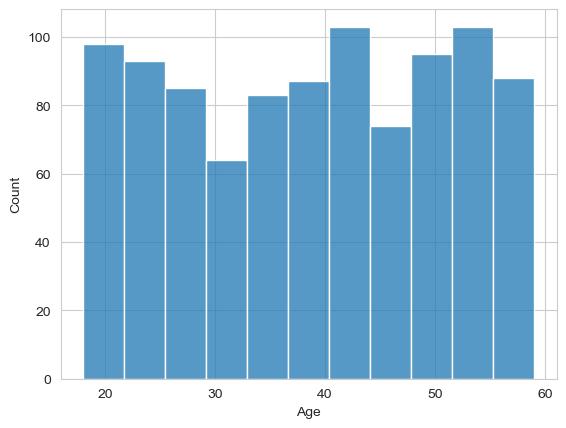

In [204]:
sns.histplot(data, x = "Age")
plt.show()

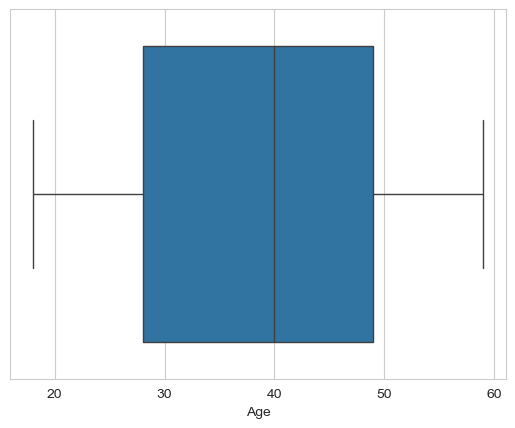

In [205]:
sns.boxplot(data, x = "Age")
plt.show()

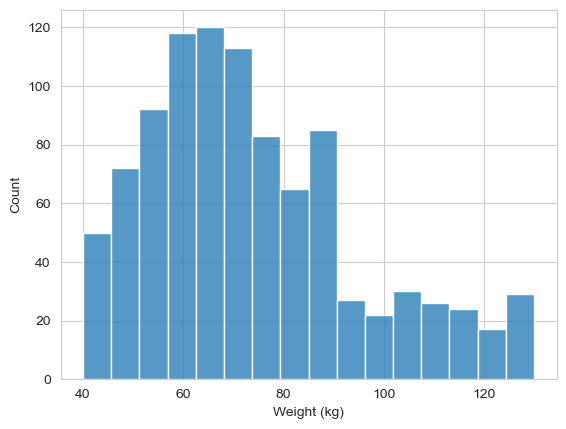

In [206]:
sns.histplot(data, x = "Weight (kg)")
plt.show()

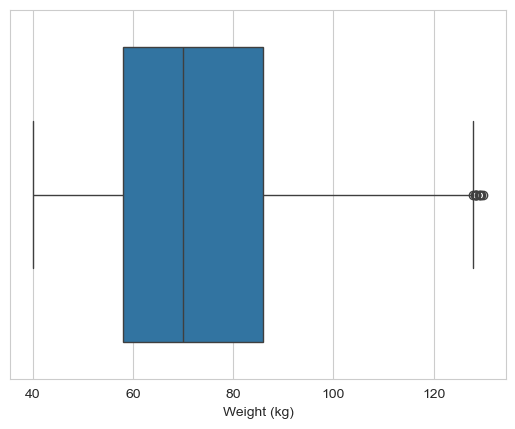

In [207]:
sns.boxplot(data, x = "Weight (kg)")
plt.show()

In [208]:
data[data["Weight (kg)"] > 129] #Only males

#Question: Can person with index 122 has greater fat precentage than persons with index 593 and 854, considering that
#person with index 122 is almost 2m high and other two persons are more than 20cm shorter than him?

Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
122   56   Male        129.5        1.95      160      129           66   
593   55   Male        129.9        1.73      187      155           60   
854   48   Male        129.2        1.61      193      167           62   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
122                      1.00            639.0     Strength            25.2   
593                      0.69            529.0         Yoga            21.7   
854                      1.06            876.0         Yoga            21.4   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
122                    3.5                              2                 1   
593                    3.1                              3                 1   
854                    2.9                              4                 2   

       BMI  
122  34.06  
593  43.40  
854  49.84

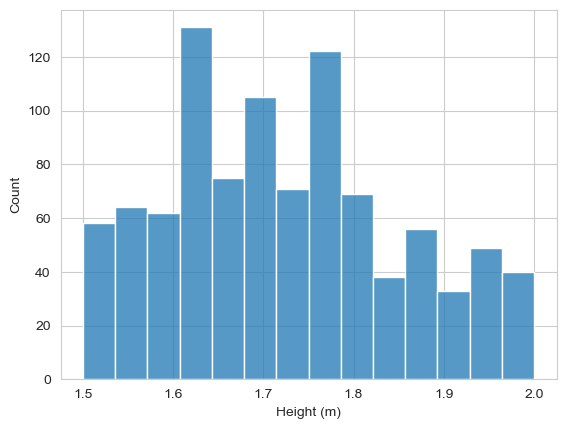

In [209]:
sns.histplot(data, x = "Height (m)")
plt.show()

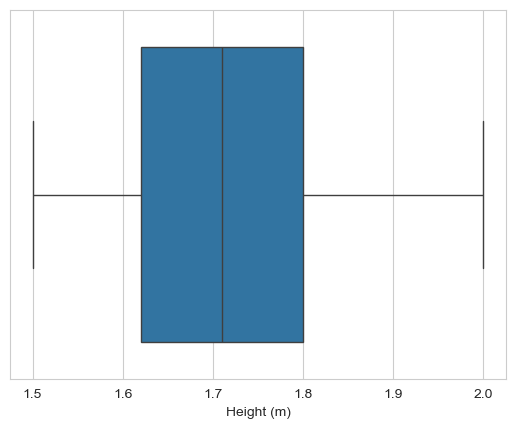

In [210]:
sns.boxplot(data, x = "Height (m)")
plt.show()

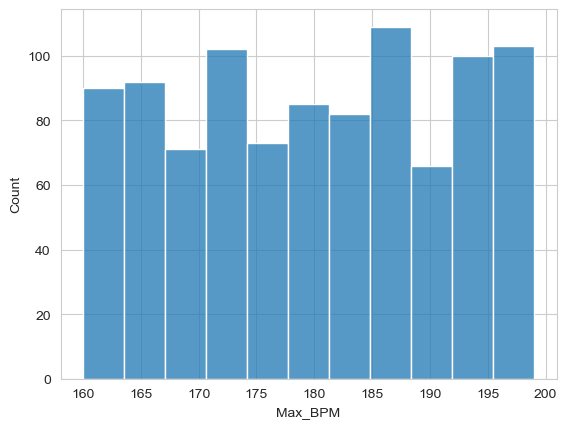

In [211]:
sns.histplot(data, x = "Max_BPM")
plt.show()

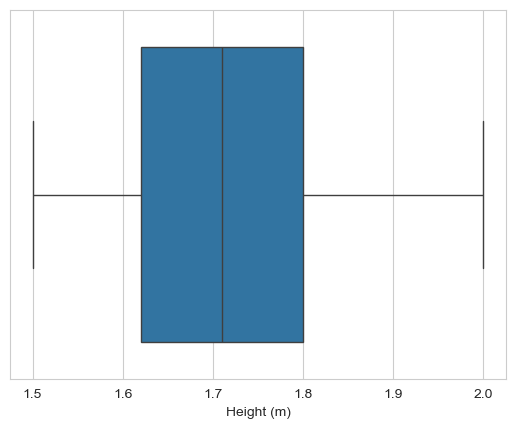

In [212]:
sns.boxplot(data, x = "Height (m)")
plt.show()

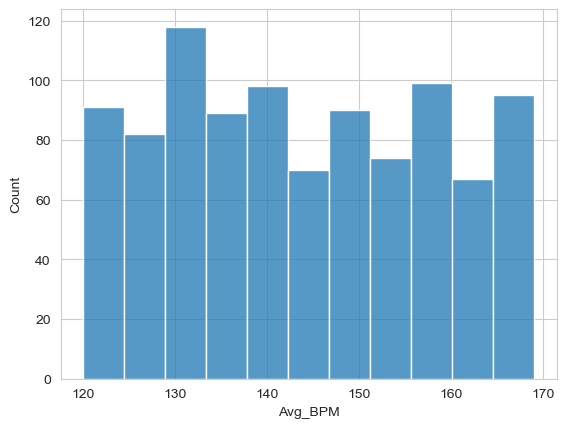

In [213]:
sns.histplot(data, x = "Avg_BPM")
plt.show()

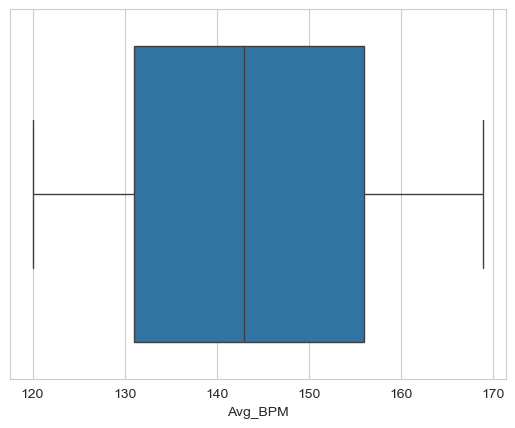

In [214]:
sns.boxplot(data, x = "Avg_BPM")
plt.show()

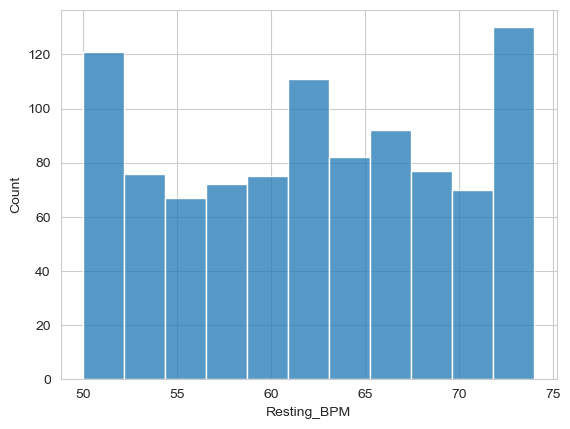

In [215]:
sns.histplot(data, x = "Resting_BPM")
plt.show()

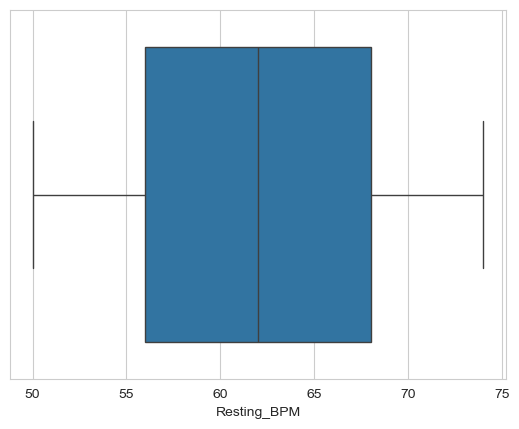

In [216]:
sns.boxplot(data, x = "Resting_BPM")
plt.show()

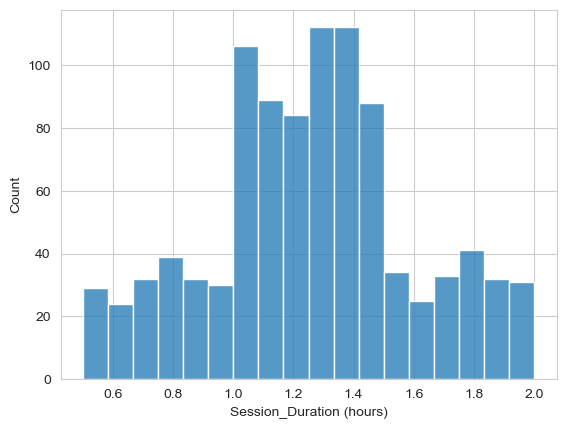

In [217]:
sns.histplot(data, x = "Session_Duration (hours)")
plt.show()

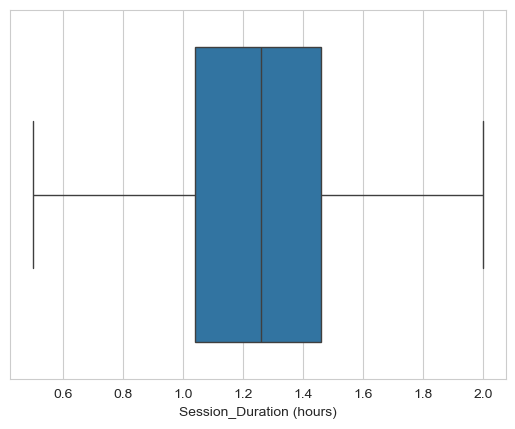

In [218]:
sns.boxplot(data, x = "Session_Duration (hours)")
plt.show()

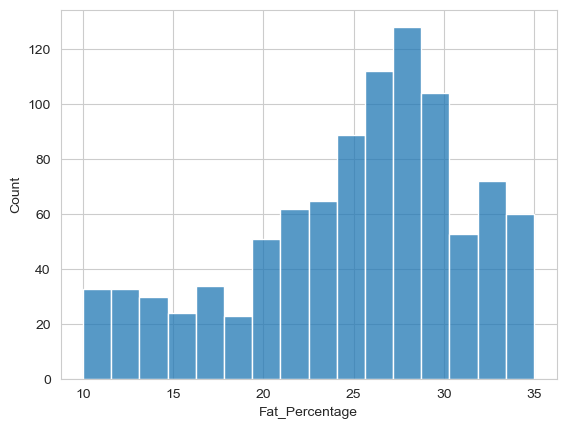

In [219]:
sns.histplot(data, x = "Fat_Percentage")
plt.show()

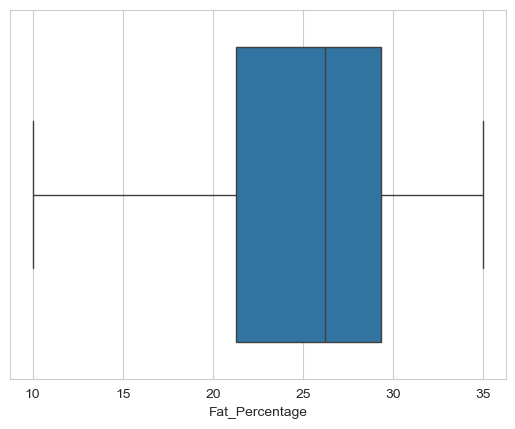

In [220]:
sns.boxplot(data, x = "Fat_Percentage")
plt.show()

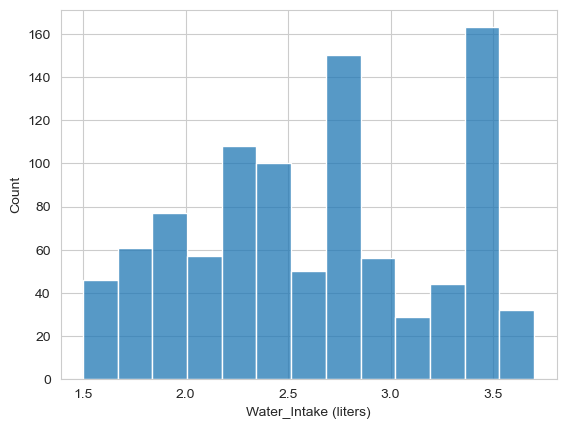

In [221]:
sns.histplot(data, x = "Water_Intake (liters)")
plt.show()

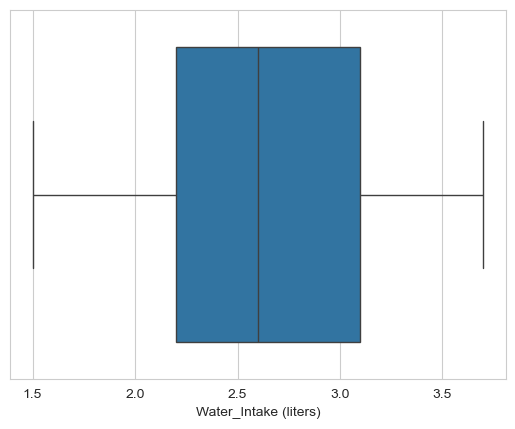

In [222]:
sns.boxplot(data, x = "Water_Intake (liters)")
plt.show()

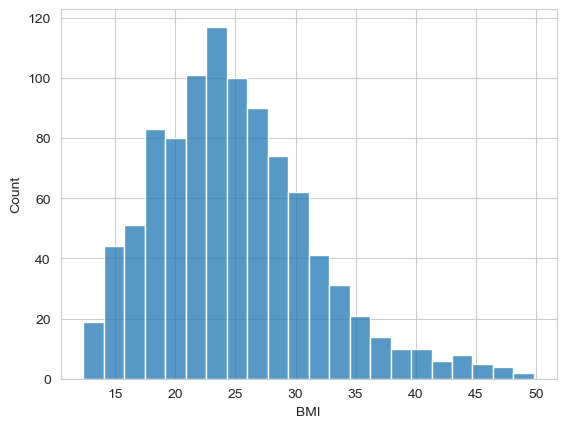

In [223]:
sns.histplot(data, x = "BMI")
plt.show()

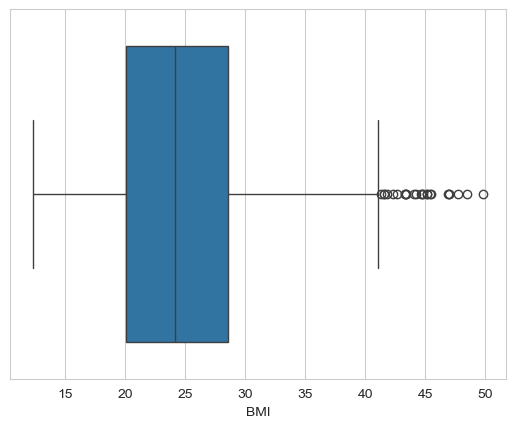

In [224]:
sns.boxplot(data, x = "BMI")
plt.show()

In [225]:
data[data["BMI"] > 42]

Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
10    41   Male        120.8        1.67      188      146           54   
12    57   Male        112.5        1.61      195      165           61   
35    26   Male        127.6        1.73      167      160           62   
55    23   Male        114.8        1.60      182      163           60   
133   21   Male        125.2        1.66      196      159           60   
251   33   Male        117.0        1.61      166      130           55   
261   57   Male        126.8        1.63      161      133           73   
291   55   Male        128.4        1.68      178      165           52   
302   36   Male        123.7        1.69      185      138           73   
345   43   Male        127.7        1.69      171      155           53   
470   34   Male        124.6        1.63      161      136           66   
524   36   Male        112.4        1.63      164      135           58   
593   55   Male        129.9        1.73      187      155           60   
687   18   Male        125.9        1.67      172      153           60   
710   38   Male        123.3        1.62      161      165           65   
833   59   Male        126.4        1.69      168      149           68   
854   48   Male        129.2        1.61      193      167           62   
868   47   Male        127.8        1.65      198      157           60   
924   18   Male        118.6        1.64      188      134           67   
936   54   Male        117.2        1.62      172      143           56   
945   35   Male        127.1        1.62      187      128           69   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
10                       0.82            593.0         HIIT            20.5   
12                       1.24           1013.0       Cardio            22.1   
35                       1.32           1162.0     Strength            27.3   
55                       1.47           1318.0       Cardio            21.7   
133                      1.38           1207.0         HIIT            29.8   
251                      1.04            744.0         HIIT            25.1   
261                      0.96            632.0         Yoga            20.8   
291                      1.13            923.0       Cardio            20.4   
302                      1.30            987.0       Cardio            20.4   
345                      1.14            875.0       Cardio            24.1   
470                      1.41           1055.0         HIIT            27.6   
524                      1.02            757.0       Cardio            25.0   
593                      0.69            529.0         Yoga            21.7   
687                      1.46           1229.0         Yoga            20.6   
710                      1.34           1216.0         Yoga            21.2   
833                      1.24            915.0     Strength            29.5   
854                      1.06            876.0         Yoga            21.4   
868                      0.77            598.0       Cardio            28.7   
924                      0.94            693.0       Cardio            25.6   
936                      1.04            736.0         HIIT            23.1   
945                      1.02            718.0     Strength            23.3   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
10                     3.0                              2                 1   
12                     2.7                              3                 2   
35                     2.9                              3                 1   
55                     2.7                              4                 2   
133                    3.4                              3                 2   
251                    2.4                              3                 2   
261                    2.1                              2     

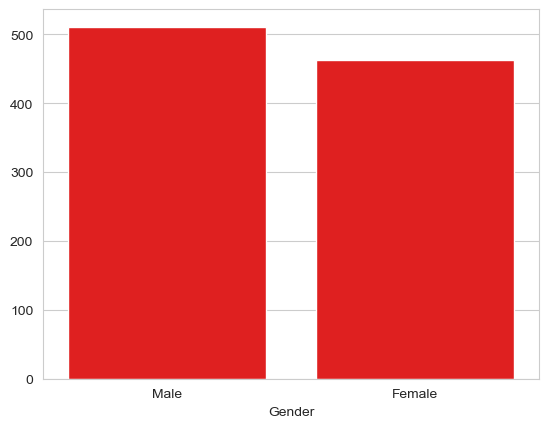

In [226]:
sns.barplot(x=data["Gender"].value_counts().index, 
            y=data["Gender"].value_counts().values, 
            color="red")
plt.show()

In [227]:
male = data[data["Gender"] == "Male"]
female = data[data["Gender"] == "Female"]

In [228]:
male.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  511.000000   511.000000  511.000000  511.000000  511.000000   
mean    38.998043    85.531115    1.793405  179.996086  143.898239   
std     12.045258    21.788629    0.117081   11.678873   14.300193   
min     18.000000    45.000000    1.600000  160.000000  120.000000   
25%     29.000000    69.750000    1.690000  170.000000  132.000000   
50%     40.000000    85.300000    1.790000  180.000000  143.000000   
75%     49.000000   101.600000    1.890000  189.000000  157.000000   
max     59.000000   129.900000    2.000000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   511.000000                511.000000       511.000000      511.000000   
mean     62.320939                  1.252446       944.455969       22.553816   
std       7.403943                  0.344297       286.590987        5.729882   
min      50.000000                  0.510000       331.000000       10.000000   
25%      56.000000                  1.040000       742.000000       20.700000   
50%      63.000000                  1.270000       937.000000       23.800000   
75%      68.500000                  1.450000      1138.500000       27.200000   
max      74.000000                  2.000000      1783.000000       30.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             511.000000                     511.000000        511.000000   
mean                3.007436                       3.305284          1.812133   
std                 0.494146                       0.927125          0.740912   
min                 2.000000                       2.000000          1.000000   
25%                 2.600000                       3.000000          1.000000   
50%                 3.100000                       3.000000          2.000000   
75%                 3.500000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  511.000000  
mean    26.886967  
std      7.630492  
min     12.320000  
25%     21.160000  
50%     26.220000  
75%     31.725000  
max     49.840000

In [229]:
female.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  462.000000   462.000000  462.000000  462.000000  462.000000   
mean    38.335498    60.939827    1.644242  179.759740  143.621212   
std     12.332962    10.237671    0.086710   11.365199   14.408716   
min     18.000000    40.000000    1.500000  160.000000  120.000000   
25%     28.000000    54.050000    1.570000  170.000000  131.000000   
50%     39.000000    61.350000    1.640000  180.000000  143.000000   
75%     49.750000    69.175000    1.720000  190.000000  156.000000   
max     59.000000    79.900000    1.800000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   462.000000                462.000000       462.000000      462.000000   
mean     62.114719                  1.260823       862.248918       27.656710   
std       7.247547                  0.341950       249.614915        5.708223   
min      50.000000                  0.500000       303.000000       15.000000   
25%      56.000000                  1.040000       710.250000       25.625000   
50%      62.000000                  1.260000       867.000000       28.900000   
75%      68.000000                  1.460000      1016.000000       32.200000   
max      74.000000                  1.990000      1625.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             462.000000                     462.000000        462.000000   
mean                2.205411                       3.339827          1.807359   
std                 0.388323                       0.897873          0.739137   
min                 1.500000                       2.000000          1.000000   
25%                 1.900000                       3.000000          1.000000   
50%                 2.200000                       3.000000          2.000000   
75%                 2.600000                       4.000000          2.000000   
max                 2.700000                       5.000000          3.000000   

              BMI  
count  462.000000  
mean    22.727835  
std      4.475390  
min     12.470000  
25%     19.432500  
50%     22.925000  
75%     26.050000  
max     35.040000

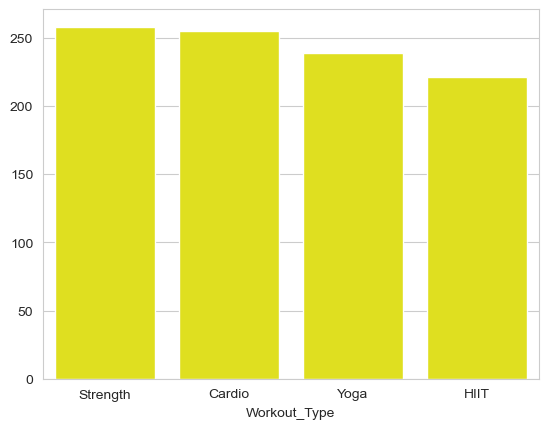

In [230]:
sns.barplot(x=data["Workout_Type"].value_counts().index, 
            y=data["Workout_Type"].value_counts().values, 
            color="yellow")
plt.show()

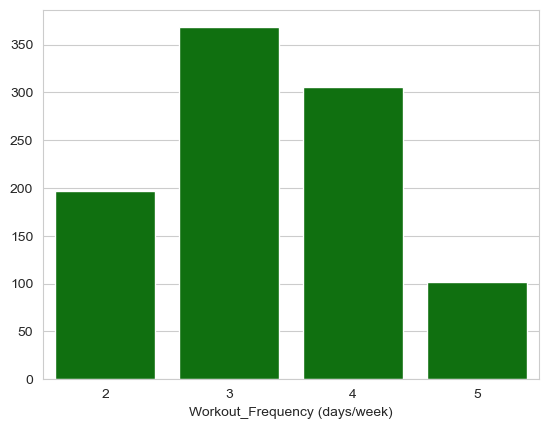

In [231]:
sns.barplot(x=data["Workout_Frequency (days/week)"].value_counts().index, 
            y=data["Workout_Frequency (days/week)"].value_counts().values, 
            color="green")
plt.show()

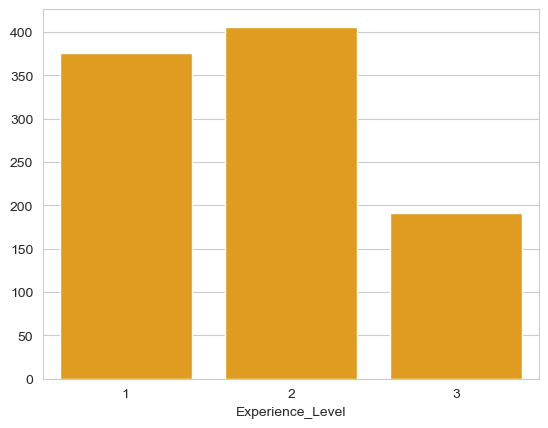

In [232]:
sns.barplot(x=data["Experience_Level"].value_counts().index, 
            y=data["Experience_Level"].value_counts().values, 
            color="orange")
plt.show()

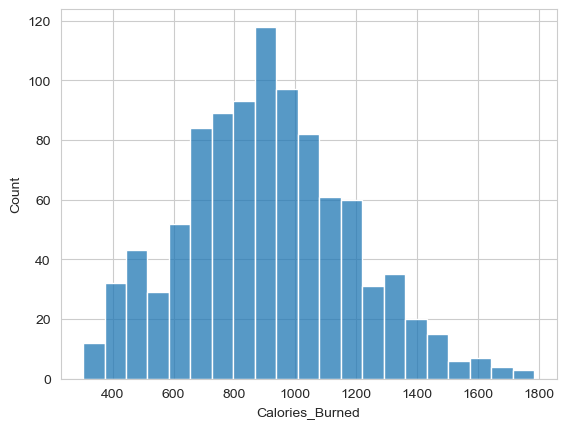

In [233]:
sns.histplot(data, x = "Calories_Burned")
plt.show()

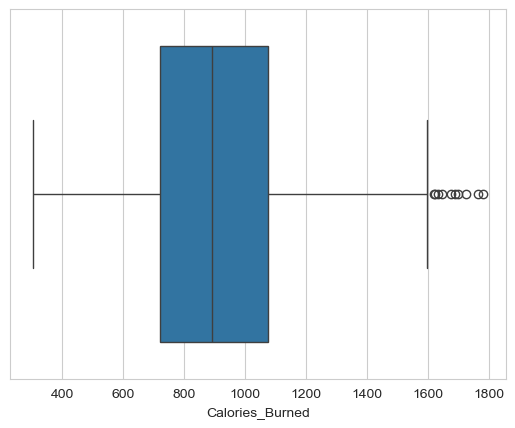

In [234]:
sns.boxplot(data, x = "Calories_Burned")
plt.show()

In [235]:
data[data["Calories_Burned"] > 1600] #Some people have high BMI level, but it's likely that these people have high muscle level.

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
90    25    Male         81.5        1.61      170      159           63   
99    24  Female         60.1        1.79      170      165           63   
124   26    Male         86.2        1.68      189      157           72   
475   27    Male         89.3        1.64      192      162           64   
511   39    Male         86.2        1.82      191      160           72   
572   36    Male         88.0        1.71      185      160           73   
646   22    Male         88.5        1.62      174      162           69   
712   19    Male         82.4        1.96      174      169           62   
728   47    Male         87.2        1.64      177      165           50   
910   32    Male         89.8        1.92      199      168           67   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
90                       1.93           1688.0         HIIT            10.9   
99                       1.97           1625.0       Cardio            15.9   
124                      1.97           1701.0     Strength            13.3   
475                      1.82           1622.0         HIIT            12.1   
511                      1.96           1725.0     Strength            10.2   
572                      1.87           1646.0         HIIT            12.0   
646                      1.88           1675.0     Strength            10.7   
712                      1.90           1766.0         HIIT            10.1   
728                      2.00           1634.0     Strength            15.0   
910                      1.93           1783.0     Strength            10.6   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
90                     3.5                              4                 3   
99                     2.7                              4                 3   
124                    3.5                              5                 3   
475                    3.5                              4                 3   
511                    3.5                              5                 3   
572                    3.5                              5                 3   
646                    3.5                              5                 3   
712                    3.5                              5                 3   
728                    3.5                              4                 3   
910                    3.5                              4                 3   

       BMI  
90   31.44  
99   18.76  
124  30.54  
475  33.20  
511  26.02  
572  30.09  
646  33.72  
712  21.45  
728  32.42  
910  24.36

In [236]:
data = data.rename(columns={
    "Weight (kg)": "Weight",
    "Height (m)": "Height",
    "Session_Duration (hours)": "Session_Duration",
    "Water_Intake (liters)": "Water_Intake",
    "Workout_Frequency (days/week)": "Workout_Frequency"
})
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male    88.3    1.71      180      157           60   
1     46  Female    74.9    1.53      179      151           66   
2     32  Female    68.1    1.66      167      122           54   
3     25    Male    53.2    1.70      190      164           56   
4     38    Male    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24    Male    87.1    1.74      187      158           67   
969   25    Male    66.6    1.61      184      166           56   
970   59  Female    60.4    1.76      194      120           53   
971   32    Male   126.4    1.83      198      146           62   
972   46    Male    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned Workout_Type  Fat_Percentage  \
0                1.69           1313.0         Yoga            12.6   
1                1.30            883.0         HIIT            33.9   
2                1.11            677.0       Cardio            33.4   
3                0.59            532.0     Strength            28.8   
4                0.64            556.0     Strength            29.2   
..                ...              ...          ...             ...   
968              1.57           1364.0     Strength            10.0   
969              1.38           1260.0     Strength            25.0   
970              1.72            929.0       Cardio            18.8   
971              1.10            883.0         HIIT            28.2   
972              0.75            542.0     Strength            28.8   

     Water_Intake  Workout_Frequency  Experience_Level    BMI  
0             3.5                  4                 3  30.20  
1             2.1                  4                 2  32.00  
2             2.3                  4                 2  24.71  
3             2.1                  3                 1  18.41  
4             2.8                  3                 1  14.39  
..            ...                ...               ...    ...  
968           3.5                  4                 3  28.77  
969           3.0                  2                 1  25.69  
970           2.7                  5                 3  19.50  
971           2.1                  3                 2  37.74  
972           3.5                  2                 1  33.38  

[973 rows x 15 columns]

In [237]:
data["Ex_Level_Workout_Freq"] = data["Experience_Level"] * data["Workout_Frequency"]
data["Calories_Per_Hour"] = data["Calories_Burned"] / data["Session_Duration"]

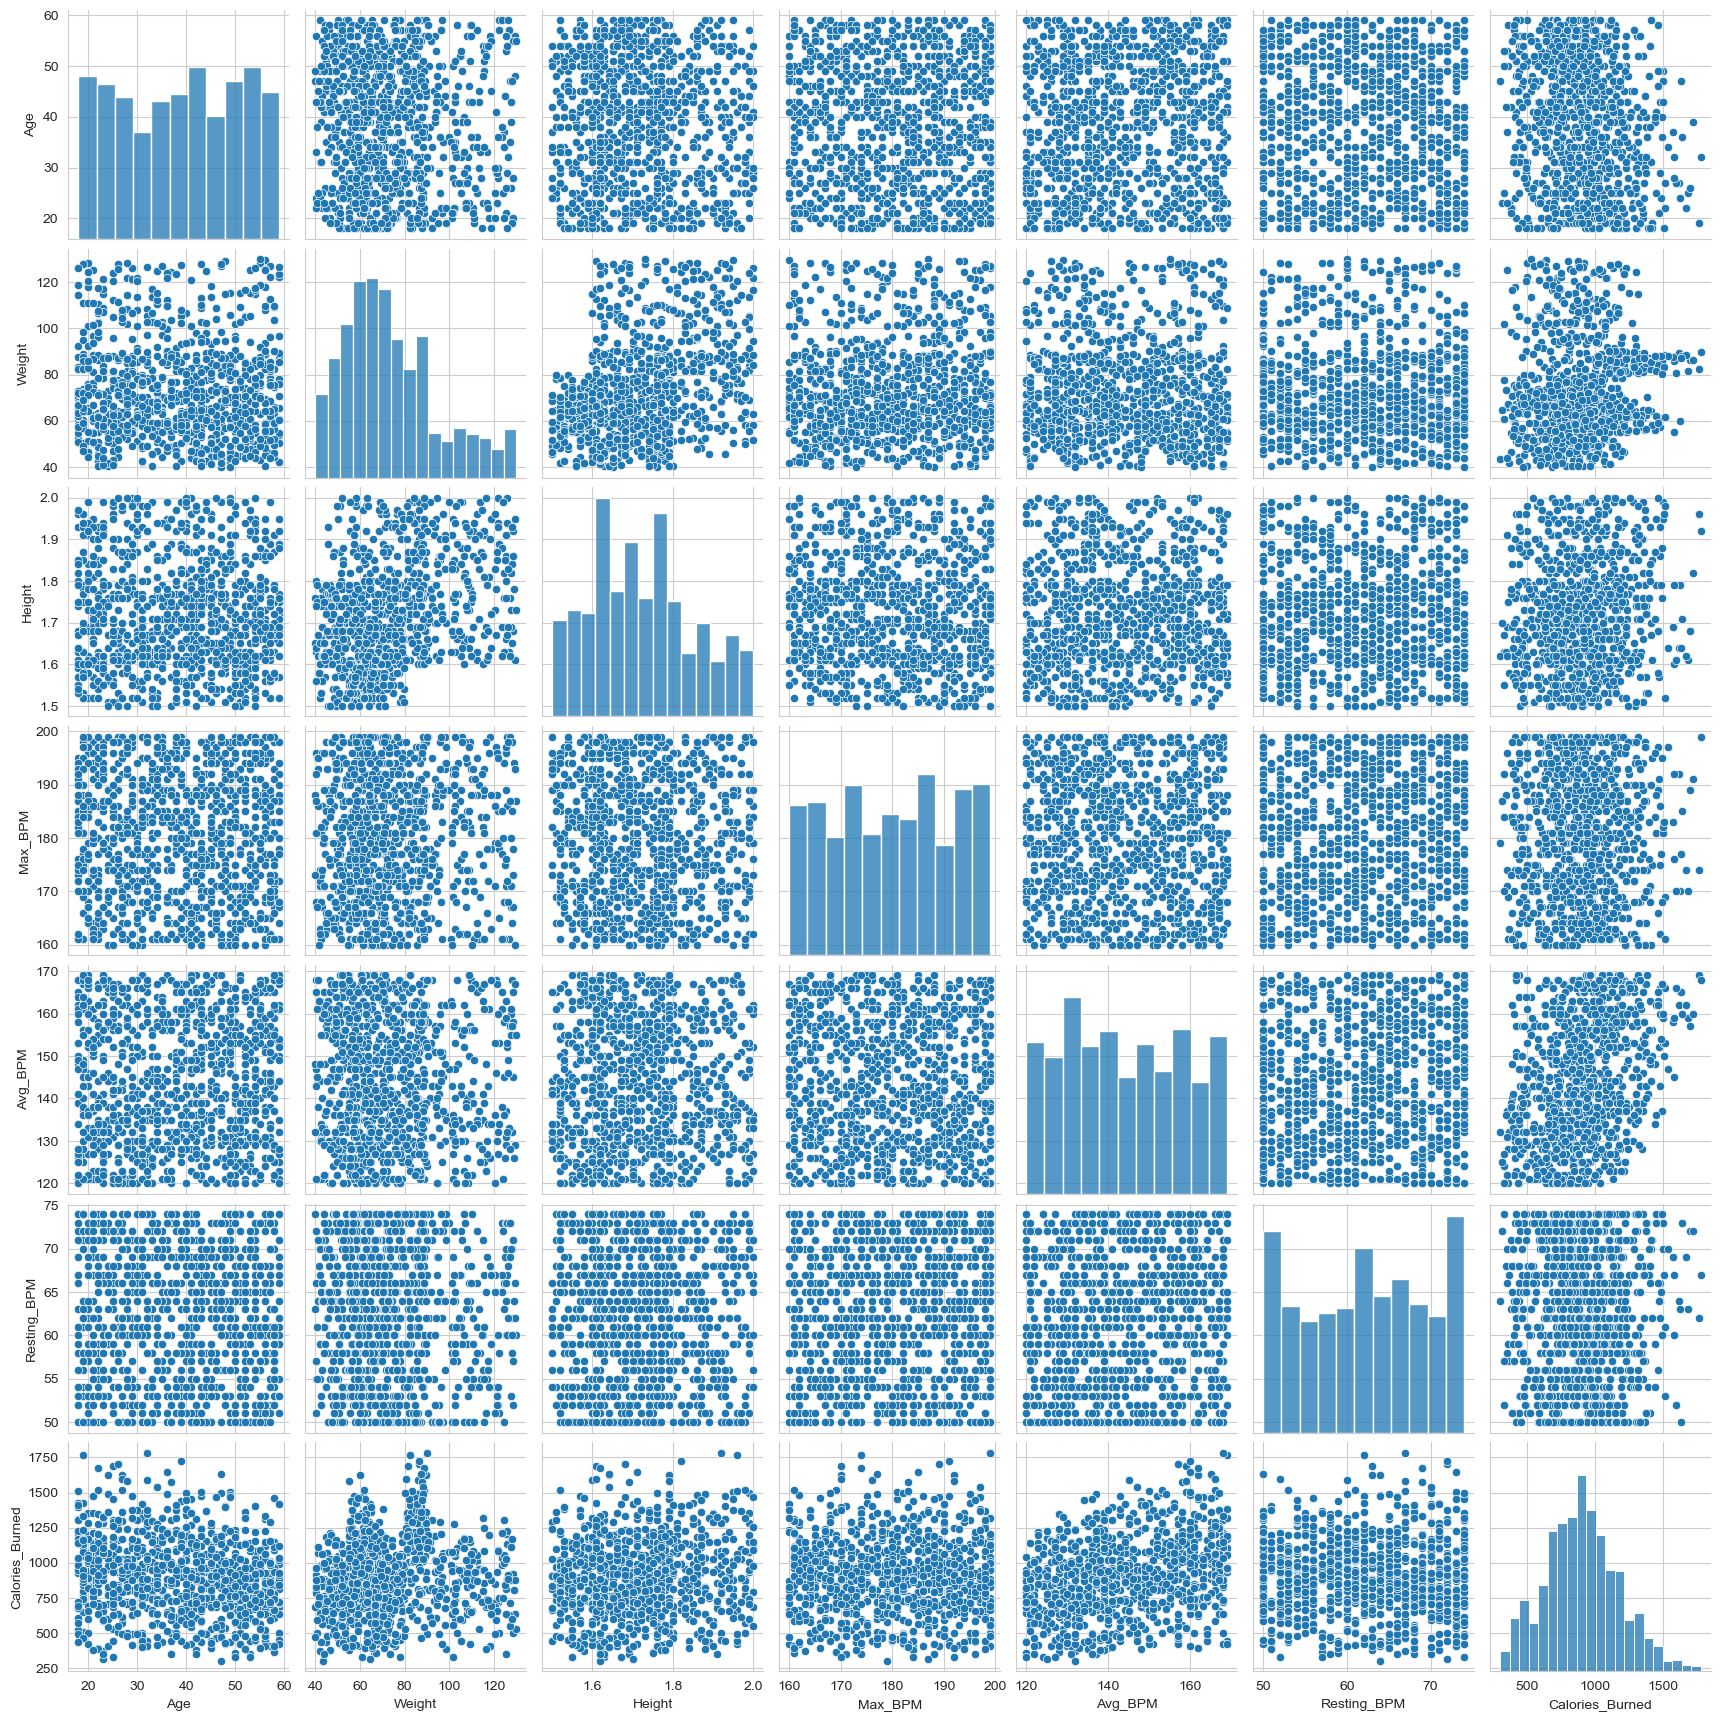

In [238]:
data1 = data[["Age", "Weight", "Height", "Max_BPM", "Avg_BPM", "Resting_BPM", "Calories_Burned"]]
sns.set_style("whitegrid")
sns.pairplot(data1)
plt.show()

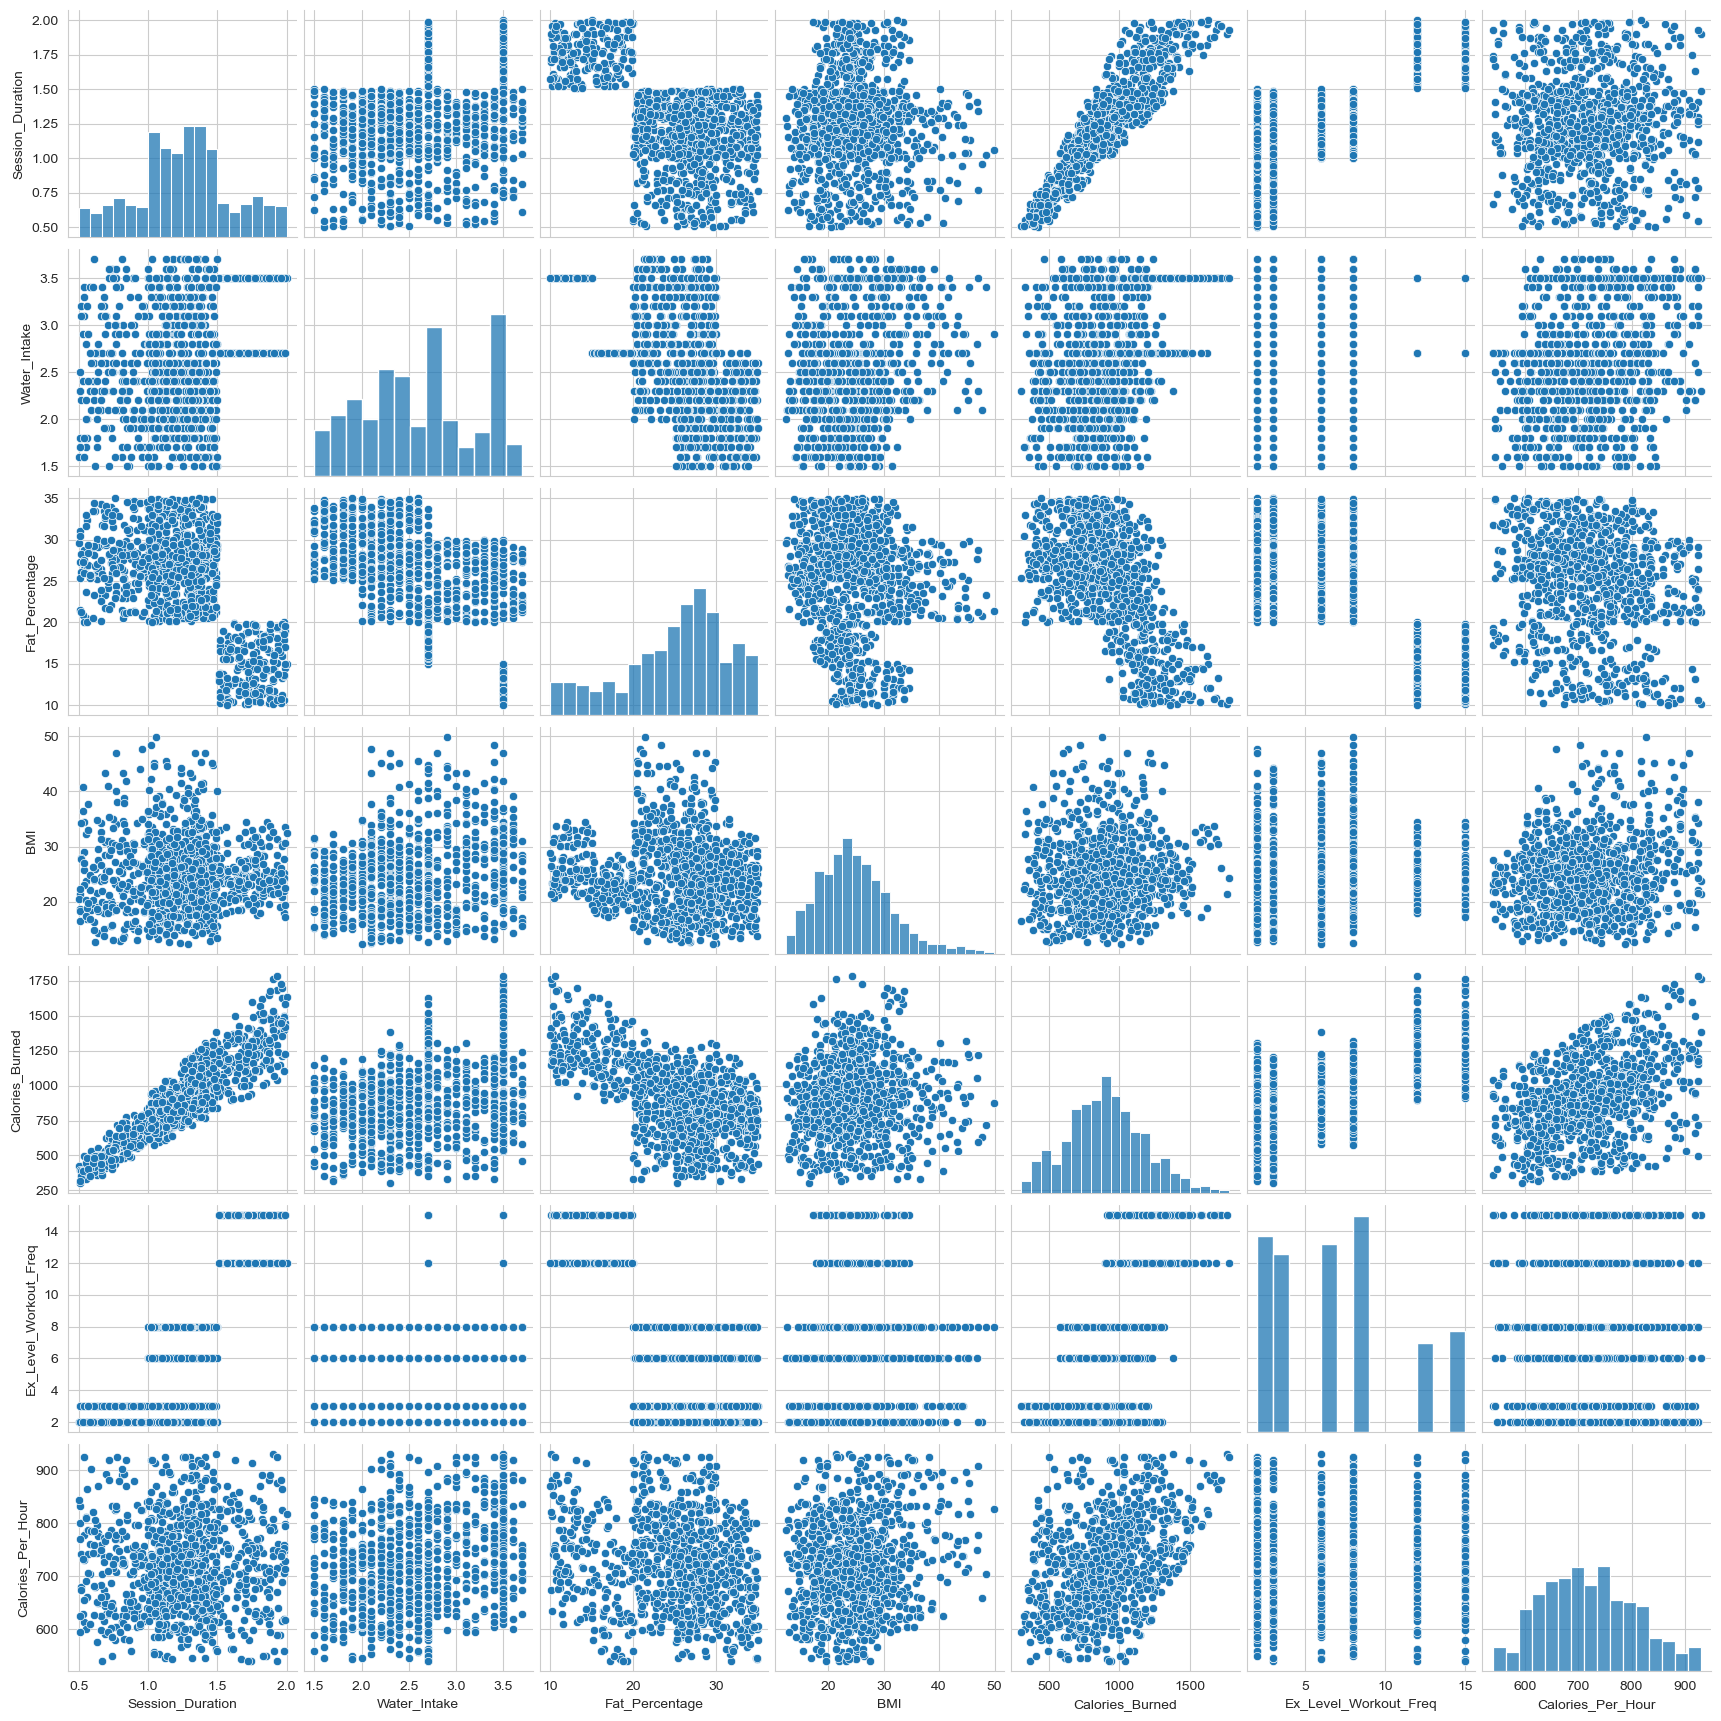

In [239]:
data2 = data[["Session_Duration", "Water_Intake", "Fat_Percentage", "BMI", 
              "Calories_Burned", "Ex_Level_Workout_Freq", "Calories_Per_Hour"]]
sns.set_style("whitegrid")
sns.pairplot(data2)
plt.show()

In [240]:
raw_data = data.copy(deep=True)
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
data['Gender'] = encoder1.fit_transform(data["Gender"])
data["Workout_Type"] = encoder2.fit_transform(data["Workout_Type"])
data_copy = data.copy(deep=True)
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       1    88.3    1.71      180      157           60   
1     46       0    74.9    1.53      179      151           66   
2     32       0    68.1    1.66      167      122           54   
3     25       1    53.2    1.70      190      164           56   
4     38       1    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24       1    87.1    1.74      187      158           67   
969   25       1    66.6    1.61      184      166           56   
970   59       0    60.4    1.76      194      120           53   
971   32       1   126.4    1.83      198      146           62   
972   46       1    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned  Workout_Type  Fat_Percentage  \
0                1.69           1313.0             3            12.6   
1                1.30            883.0             1            33.9   
2                1.11            677.0             0            33.4   
3                0.59            532.0             2            28.8   
4                0.64            556.0             2            29.2   
..                ...              ...           ...             ...   
968              1.57           1364.0             2            10.0   
969              1.38           1260.0             2            25.0   
970              1.72            929.0             0            18.8   
971              1.10            883.0             1            28.2   
972              0.75            542.0             2            28.8   

     Water_Intake  Workout_Frequency  Experience_Level    BMI  \
0             3.5                  4                 3  30.20   
1             2.1                  4                 2  32.00   
2             2.3                  4                 2  24.71   
3             2.1                  3                 1  18.41   
4             2.8                  3                 1  14.39   
..            ...                ...               ...    ...   
968           3.5                  4                 3  28.77   
969           3.0                  2                 1  25.69   
970           2.7                  5                 3  19.50   
971           2.1                  3                 2  37.74   
972           3.5                  2                 1  33.38   

     Ex_Level_Workout_Freq  Calories_Per_Hour  
0                       12         776.923077  
1                        8         679.230769  
2                        8         609.909910  
3                        3         901.694915  
4                        3         868.750000  
..                     ...                ...  
968                     12         868.789809  
969                      2         913.043478  
970                     15         540.116279  
971                      6         802.727273  
972                      2         722.666667  

[973 rows x 17 columns]

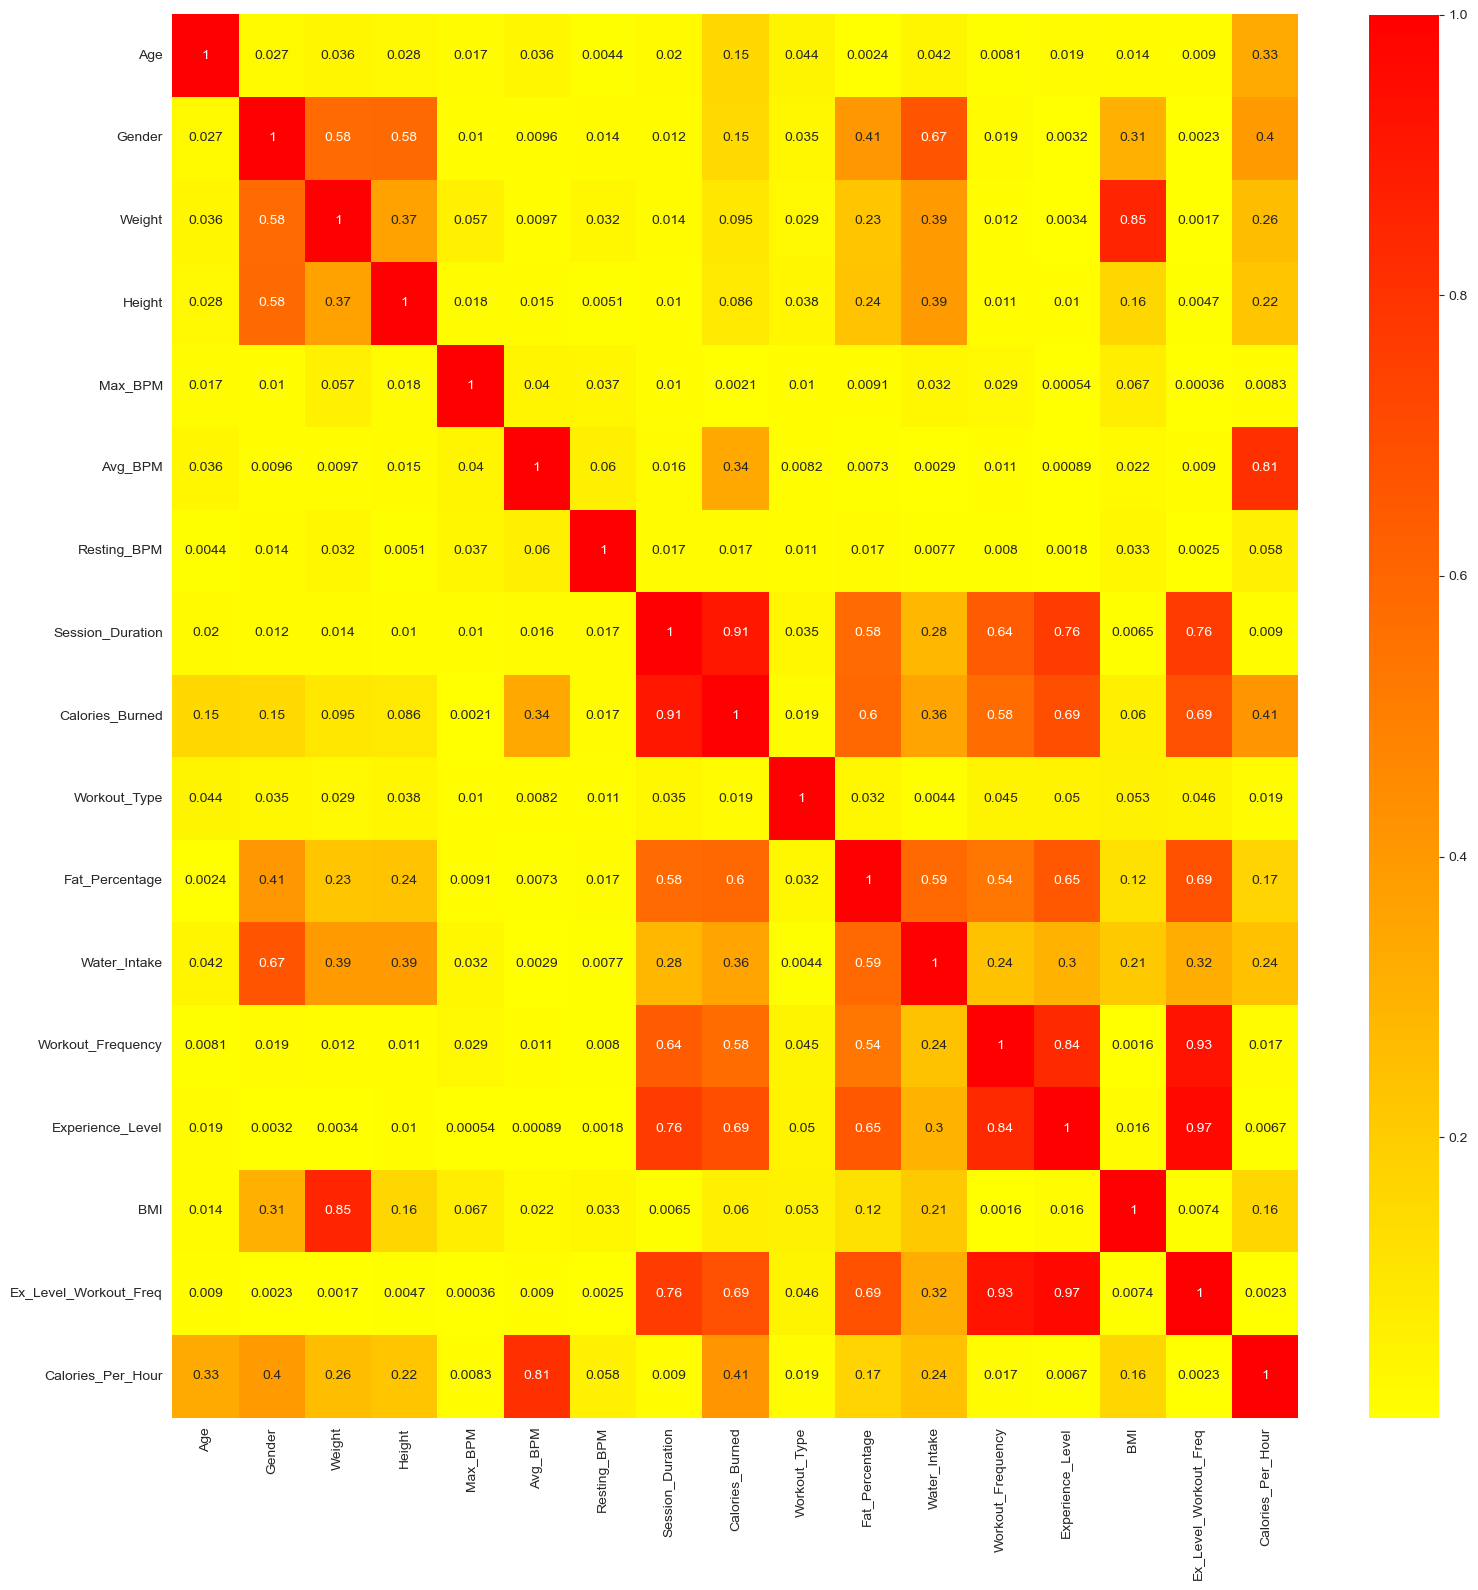

In [241]:
corr_matrix = data_copy.corr()
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(abs(corr_matrix), annot=True, cmap=plt.cm.autumn_r)
fig.tight_layout()
plt.show()

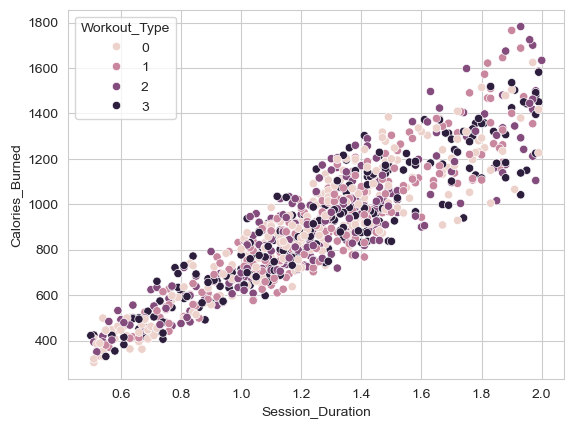

In [242]:
sns.scatterplot(data, x = "Session_Duration", y = "Calories_Burned", hue = "Workout_Type")
plt.show()

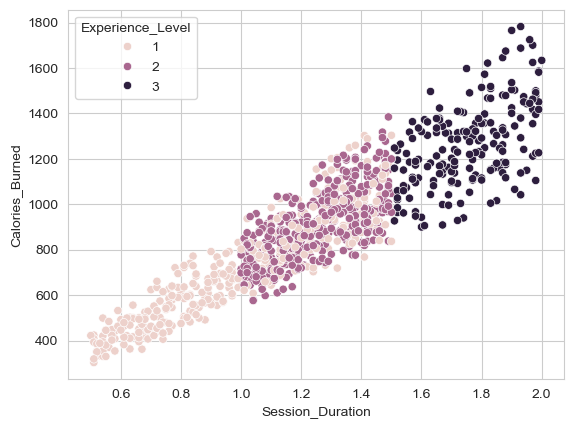

In [243]:
sns.scatterplot(data, x = "Session_Duration", y = "Calories_Burned", hue = "Experience_Level")
plt.show()

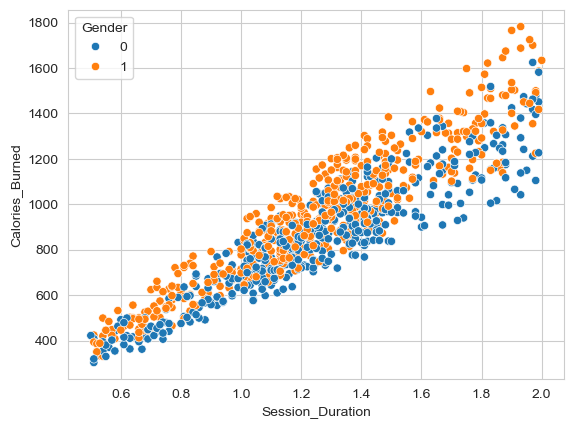

In [244]:
sns.scatterplot(data, x = "Session_Duration", y = "Calories_Burned", hue = "Gender")
plt.show()

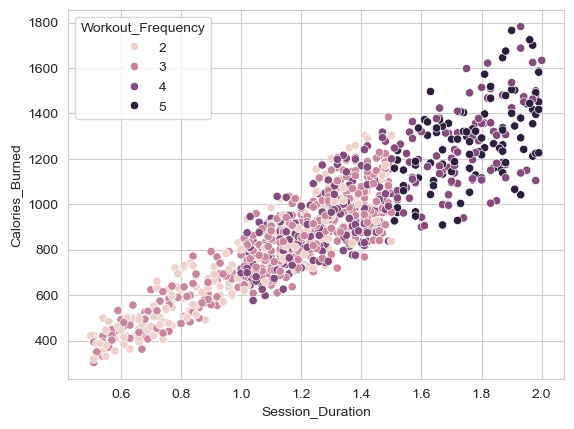

In [245]:
sns.scatterplot(data, x = "Session_Duration", y = "Calories_Burned", hue = "Workout_Frequency")
plt.show()

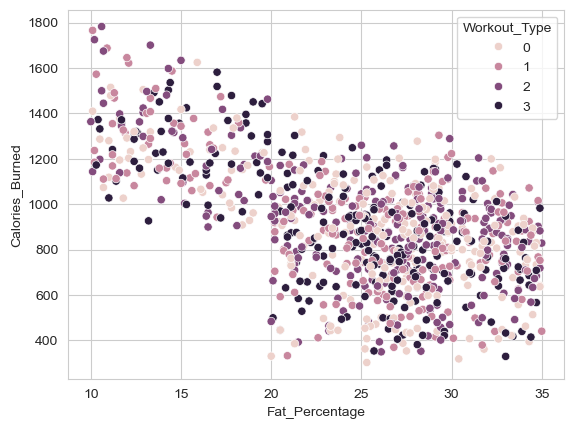

In [246]:
sns.scatterplot(data, x = "Fat_Percentage", y = "Calories_Burned", hue = "Workout_Type")
plt.show()

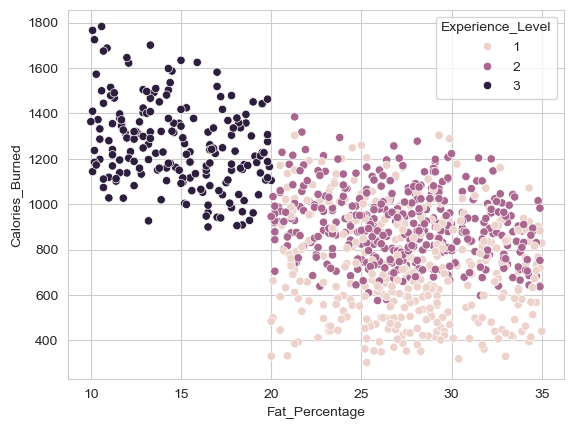

In [247]:
sns.scatterplot(data, x = "Fat_Percentage", y = "Calories_Burned", hue = "Experience_Level")
plt.show()

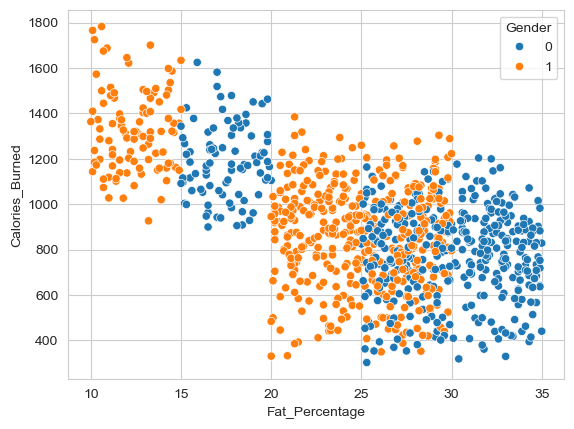

In [248]:
sns.scatterplot(data, x = "Fat_Percentage", y = "Calories_Burned", hue = "Gender")
plt.show()

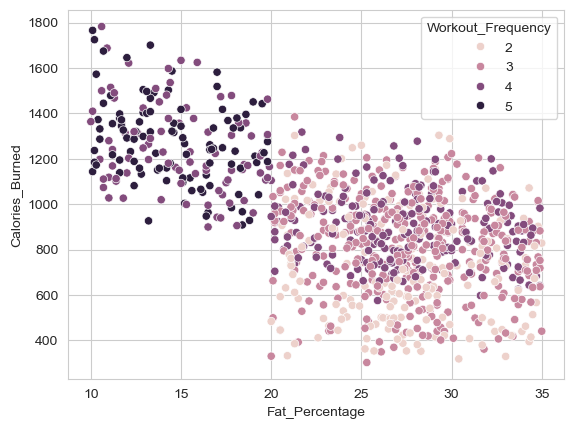

In [249]:
sns.scatterplot(data, x = "Fat_Percentage", y = "Calories_Burned", hue = "Workout_Frequency")
plt.show()

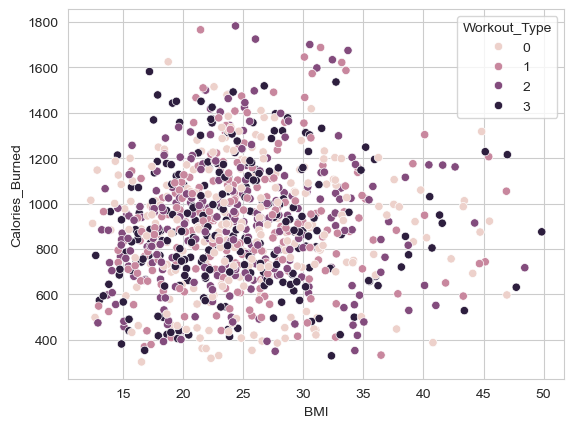

In [250]:
sns.scatterplot(data, x = "BMI", y = "Calories_Burned", hue = "Workout_Type")
plt.show()

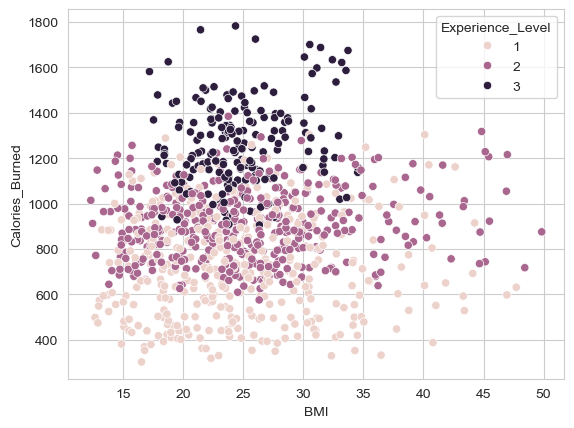

In [251]:
sns.scatterplot(data, x = "BMI", y = "Calories_Burned", hue = "Experience_Level")
plt.show()

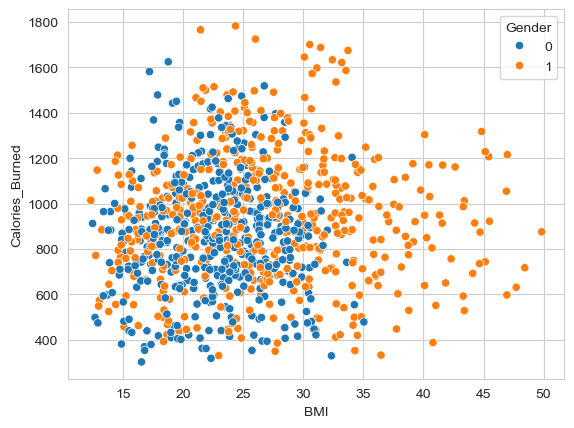

In [252]:
sns.scatterplot(data, x = "BMI", y = "Calories_Burned", hue = "Gender")
plt.show()

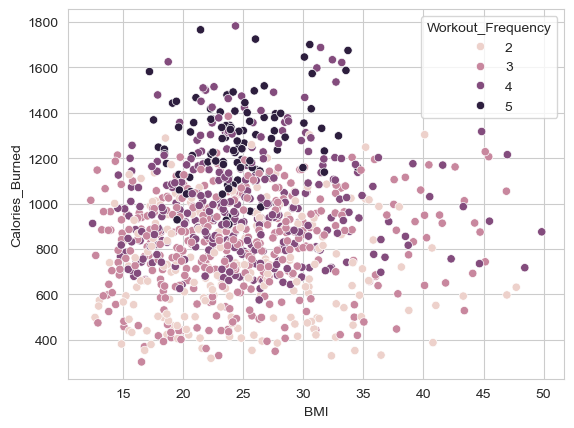

In [253]:
sns.scatterplot(data, x = "BMI", y = "Calories_Burned", hue = "Workout_Frequency")
plt.show()

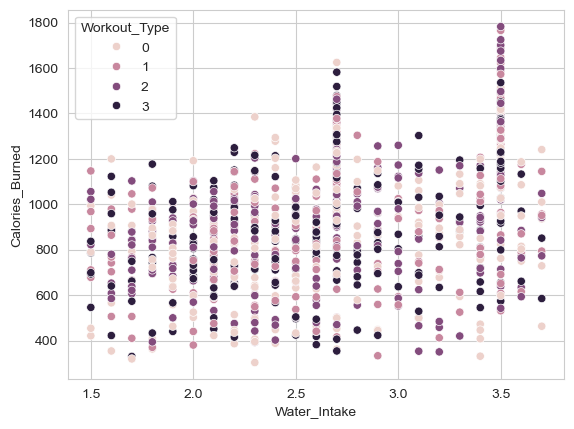

In [254]:
sns.scatterplot(data, x = "Water_Intake", y = "Calories_Burned", hue = "Workout_Type")
plt.show()

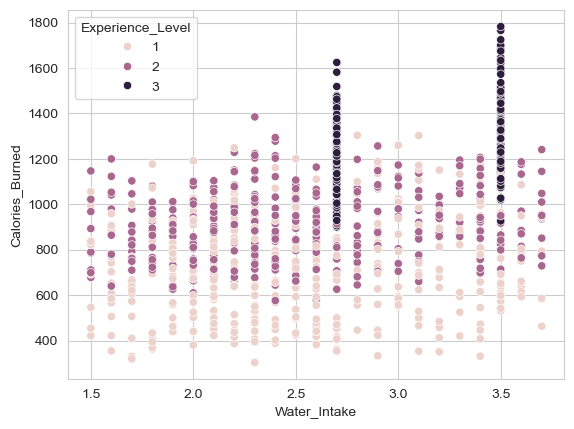

In [255]:
sns.scatterplot(data, x = "Water_Intake", y = "Calories_Burned", hue = "Experience_Level")
plt.show()

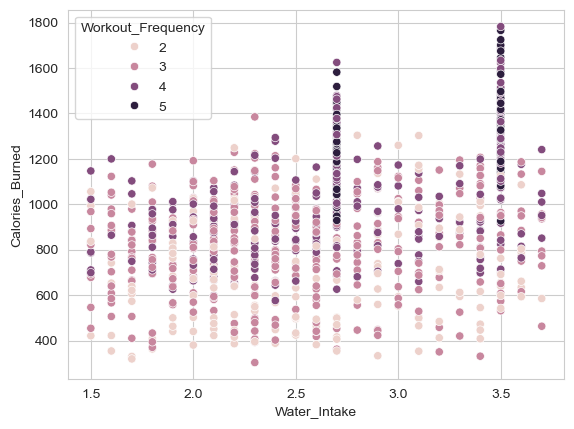

In [256]:
sns.scatterplot(data, x = "Water_Intake", y = "Calories_Burned", hue = "Workout_Frequency")
plt.show()

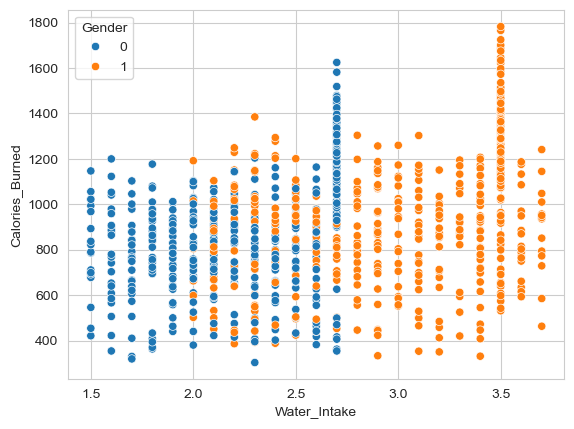

In [257]:
sns.scatterplot(data, x = "Water_Intake", y = "Calories_Burned", hue = "Gender")
plt.show()

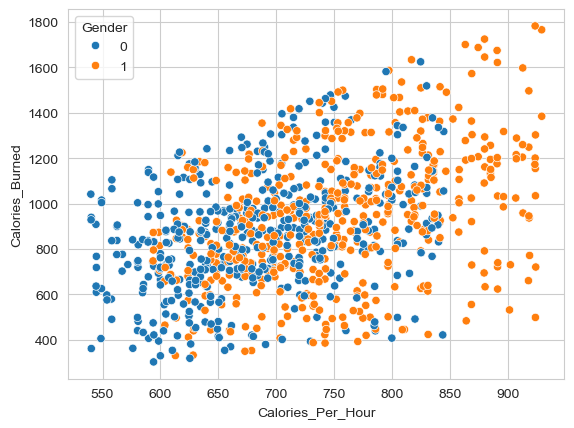

In [258]:
sns.scatterplot(data, x = "Calories_Per_Hour", y = "Calories_Burned", hue = "Gender")
plt.show()

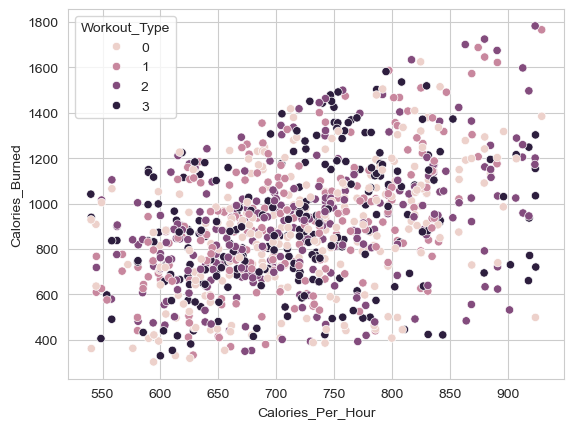

In [259]:
sns.scatterplot(data, x = "Calories_Per_Hour", y = "Calories_Burned", hue = "Workout_Type")
plt.show()

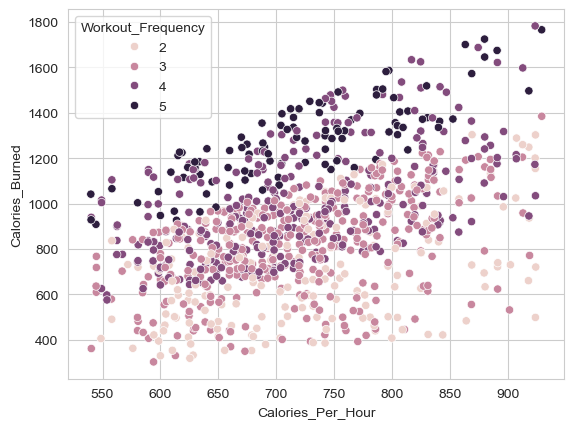

In [260]:
sns.scatterplot(data, x = "Calories_Per_Hour", y = "Calories_Burned", hue = "Workout_Frequency")
plt.show()

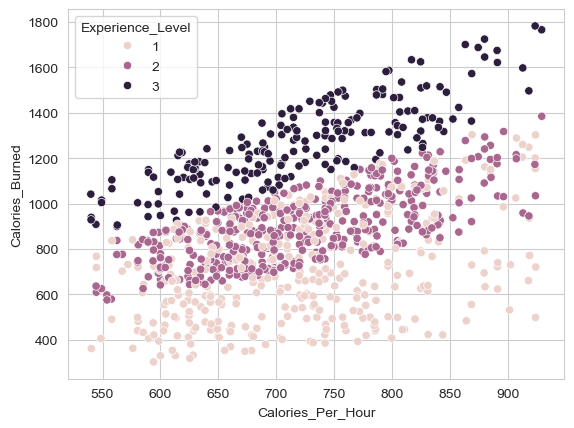

In [261]:
sns.scatterplot(data, x = "Calories_Per_Hour", y = "Calories_Burned", hue = "Experience_Level")
plt.show()

In [262]:
def cross_validate_model_with_train_test(data, formula, string, n_splits=5):
    train_mse_scores, test_mse_scores = [], []
    train_rmse_scores, test_rmse_scores = [], []
    train_mae_scores, test_mae_scores = [], []
    train_r2_scores, test_r2_scores = [], []
    train_rse_scores, test_rse_scores = [], []

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]

        model = smf.ols(formula=formula, data=train_data).fit()

        train_predictions = model.predict(train_data)
        test_predictions = model.predict(test_data)

        if string == "Calories_Burned_SQRT":
            train_residuals = train_data[string]**2 - train_predictions**2
            test_residuals = test_data[string]**2 - test_predictions**2

            train_rss = np.sum(train_residuals ** 2)
            test_rss = np.sum(test_residuals ** 2)

            train_rse = np.sqrt(train_rss / (len(train_data) - model.df_model - 1))
            test_rse = np.sqrt(test_rss / (len(test_data) - model.df_model - 1))
        
            train_mse = mean_squared_error(train_data[string]**2, train_predictions**2)
            train_rmse = np.sqrt(train_mse)
            train_mae = mean_absolute_error(train_data[string]**2, train_predictions**2)
            train_r2 = r2_score(train_data[string]**2, train_predictions**2)

            test_mse = mean_squared_error(test_data[string]**2, test_predictions**2)
            test_rmse = np.sqrt(test_mse)
            test_mae = mean_absolute_error(test_data[string]**2, test_predictions**2)
            test_r2 = r2_score(test_data[string]**2, test_predictions**2)
        else:
            train_residuals = train_data[string] - train_predictions
            test_residuals = test_data[string] - test_predictions

            train_rss = np.sum(train_residuals ** 2)
            test_rss = np.sum(test_residuals ** 2)

            train_rse = np.sqrt(train_rss / (len(train_data) - model.df_model - 1))
            test_rse = np.sqrt(test_rss / (len(test_data) - model.df_model - 1))

            train_mse = mean_squared_error(train_data[string], train_predictions)
            train_rmse = np.sqrt(train_mse)
            train_mae = mean_absolute_error(train_data[string], train_predictions)
            train_r2 = r2_score(train_data[string], train_predictions)

            test_mse = mean_squared_error(test_data[string], test_predictions)
            test_rmse = np.sqrt(test_mse)
            test_mae = mean_absolute_error(test_data[string], test_predictions)
            test_r2 = r2_score(test_data[string], test_predictions)

        train_mse_scores.append(train_mse)
        test_mse_scores.append(test_mse)

        train_rmse_scores.append(train_rmse)
        test_rmse_scores.append(test_rmse)

        train_mae_scores.append(train_mae)
        test_mae_scores.append(test_mae)

        train_r2_scores.append(train_r2)
        test_r2_scores.append(test_r2)

        train_rse_scores.append(train_rse)
        test_rse_scores.append(test_rse)

    return {
        "Train_MSE": (np.mean(train_mse_scores), np.std(train_mse_scores)),
        "Test_MSE": (np.mean(test_mse_scores), np.std(test_mse_scores)),
        "Train_RMSE": (np.mean(train_rmse_scores), np.std(train_rmse_scores)),
        "Test_RMSE": (np.mean(test_rmse_scores), np.std(test_rmse_scores)),
        "Train_MAE": (np.mean(train_mae_scores), np.std(train_mae_scores)),
        "Test_MAE": (np.mean(test_mae_scores), np.std(test_mae_scores)),
        "Train_R2": (np.mean(train_r2_scores), np.std(train_r2_scores)),
        "Test_R2": (np.mean(test_r2_scores), np.std(test_r2_scores)),
        "Train_RSE": (np.mean(train_rse_scores), np.std(train_rse_scores)),
        "Test_RSE": (np.mean(test_rse_scores), np.std(test_rse_scores)),
    }


In [269]:
predictors = ["Session_Duration", "Fat_Percentage", "Ex_Level_Workout_Freq"]
X = data[predictors]

X = sm.add_constant(X)  

vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

vif_data = vif_data[vif_data["Feature"] != "const"]

print(vif_data)

                 Feature       VIF
1       Session_Duration  2.430726
2         Fat_Percentage  1.914273
3  Ex_Level_Workout_Freq  3.031468


In [270]:
model0 = smf.ols(formula="Calories_Burned ~ Session_Duration + Fat_Percentage +  Ex_Level_Workout_Freq", 
                 data=data).fit()
data["Predicted"] = model0.predict()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     1630.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:17:12   Log-Likelihood:                -5961.4
No. Observations:                 973   AIC:                         1.193e+04
Df Residuals:                     969   BIC:                         1.195e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               198.50

In [271]:
data["Residuals"] = data["Calories_Burned"] - data["Predicted"]
std_residuals = data["Residuals"].std()
data["Std_Residuals"] = data["Residuals"] / std_residuals
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       1    88.3    1.71      180      157           60   
1     46       0    74.9    1.53      179      151           66   
2     32       0    68.1    1.66      167      122           54   
3     25       1    53.2    1.70      190      164           56   
4     38       1    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24       1    87.1    1.74      187      158           67   
969   25       1    66.6    1.61      184      166           56   
970   59       0    60.4    1.76      194      120           53   
971   32       1   126.4    1.83      198      146           62   
972   46       1    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned  Workout_Type  Fat_Percentage  \
0                1.69           1313.0             3            12.6   
1                1.30            883.0             1            33.9   
2                1.11            677.0             0            33.4   
3                0.59            532.0             2            28.8   
4                0.64            556.0             2            29.2   
..                ...              ...           ...             ...   
968              1.57           1364.0             2            10.0   
969              1.38           1260.0             2            25.0   
970              1.72            929.0             0            18.8   
971              1.10            883.0             1            28.2   
972              0.75            542.0             2            28.8   

     Water_Intake  Workout_Frequency  Experience_Level    BMI  \
0             3.5                  4                 3  30.20   
1             2.1                  4                 2  32.00   
2             2.3                  4                 2  24.71   
3             2.1                  3                 1  18.41   
4             2.8                  3                 1  14.39   
..            ...                ...               ...    ...   
968           3.5                  4                 3  28.77   
969           3.0                  2                 1  25.69   
970           2.7                  5                 3  19.50   
971           2.1                  3                 2  37.74   
972           3.5                  2                 1  33.38   

     Ex_Level_Workout_Freq  Calories_Per_Hour    Predicted   Residuals  \
0                       12         776.923077  1256.652125   56.347875   
1                        8         679.230769   874.767841    8.232159   
2                        8         609.909910   742.465762  -65.465762   
3                        3         901.694915   428.822084  103.177916   
4                        3         868.750000   462.032157   93.967843   
..                     ...                ...          ...         ...   
968                     12         868.789809  1186.761903  177.238097   
969                      2         913.043478  1019.922130  240.077870   
970                     15         540.116279  1223.447982 -294.447982   
971                      6         802.727273   778.105661  104.894339   
972                      2         722.666667   548.575603   -6.575603   

     Std_Residuals  
0         0.508204  
1         0.074246  
2        -0.590439  
3         0.930566  
4         0.847500  
..             ...  
968       1.598519  
969       2.165273  
970      -2.655640  
971       0.946047  
972      -0.059306  

[973 rows x 20 columns]

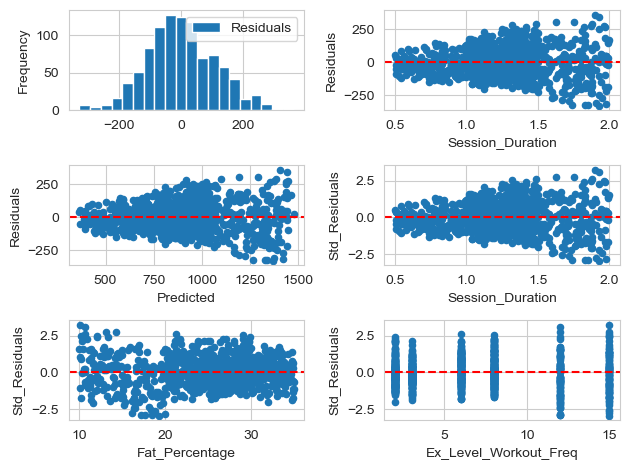

In [273]:
fig, ((g1, g2), (g3, g4), (g5, g6)) = plt.subplots(3,2)
data.plot(y = "Residuals", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Session_Duration", y = "Residuals", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Predicted", y = "Residuals", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Session_Duration", y = "Std_Residuals", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Fat_Percentage", y = "Std_Residuals", kind = "scatter", ax = g5)
g5.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Ex_Level_Workout_Freq", y = "Std_Residuals", kind = "scatter", ax = g6)
g6.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [275]:
formula = "Calories_Burned ~ Session_Duration + Fat_Percentage + Ex_Level_Workout_Freq"
results = cross_validate_model_with_train_test(data, formula, "Calories_Burned")

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 12270.2850, Std = 343.4364
Test_MSE: Mean = 12374.5260, Std = 1359.3641
Train_RMSE: Mean = 110.7603, Std = 1.5594
Test_RMSE: Mean = 111.0791, Std = 5.9960
Train_MAE: Mean = 87.6341, Std = 0.9443
Test_MAE: Mean = 88.0150, Std = 3.6844
Train_R2: Mean = 0.8347, Std = 0.0042
Test_R2: Mean = 0.8330, Std = 0.0159
Train_RSE: Mean = 111.0460, Std = 1.5634
Test_RSE: Mean = 112.2386, Std = 6.0572


In [276]:
data["Calories_Burned_SQRT"] = np.sqrt(data["Calories_Burned"])

In [277]:
model0 = smf.ols(formula="Calories_Burned_SQRT ~ Session_Duration + Fat_Percentage + Ex_Level_Workout_Freq", data=data).fit()
data["Predicted"] = model0.predict()
print(model0.summary())

                             OLS Regression Results                             
Dep. Variable:     Calories_Burned_SQRT   R-squared:                       0.842
Model:                              OLS   Adj. R-squared:                  0.841
Method:                   Least Squares   F-statistic:                     1716.
Date:                  Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                          19:18:57   Log-Likelihood:                -1970.9
No. Observations:                   973   AIC:                             3950.
Df Residuals:                       969   BIC:                             3969.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

In [278]:
data["Residuals"] = data["Calories_Burned_SQRT"] - data["Predicted"]
std_residuals = data["Residuals"].std()
data["Std_Residuals"] = data["Residuals"] / std_residuals
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       1    88.3    1.71      180      157           60   
1     46       0    74.9    1.53      179      151           66   
2     32       0    68.1    1.66      167      122           54   
3     25       1    53.2    1.70      190      164           56   
4     38       1    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24       1    87.1    1.74      187      158           67   
969   25       1    66.6    1.61      184      166           56   
970   59       0    60.4    1.76      194      120           53   
971   32       1   126.4    1.83      198      146           62   
972   46       1    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned  Workout_Type  ...  Water_Intake  \
0                1.69           1313.0             3  ...           3.5   
1                1.30            883.0             1  ...           2.1   
2                1.11            677.0             0  ...           2.3   
3                0.59            532.0             2  ...           2.1   
4                0.64            556.0             2  ...           2.8   
..                ...              ...           ...  ...           ...   
968              1.57           1364.0             2  ...           3.5   
969              1.38           1260.0             2  ...           3.0   
970              1.72            929.0             0  ...           2.7   
971              1.10            883.0             1  ...           2.1   
972              0.75            542.0             2  ...           3.5   

     Workout_Frequency  Experience_Level    BMI  Ex_Level_Workout_Freq  \
0                    4                 3  30.20                     12   
1                    4                 2  32.00                      8   
2                    4                 2  24.71                      8   
3                    3                 1  18.41                      3   
4                    3                 1  14.39                      3   
..                 ...               ...    ...                    ...   
968                  4                 3  28.77                     12   
969                  2                 1  25.69                      2   
970                  5                 3  19.50                     15   
971                  3                 2  37.74                      6   
972                  2                 1  33.38                      2   

     Calories_Per_Hour  Predicted  Residuals  Std_Residuals  \
0           776.923077  35.401336   0.834006       0.454442   
1           679.230769  29.539867   0.175449       0.095600   
2           609.909910  27.159117  -1.139893      -0.621117   
3           901.694915  21.447663   1.617462       0.881339   
4           868.750000  22.056741   1.522911       0.829819   
..                 ...        ...        ...            ...   
968         868.789809  34.046072   2.886299       1.572716   
969         913.043478  31.847304   3.649175       1.988400   
970         540.116279  35.023032  -4.543531      -2.475726   
971         802.727273  27.607615   2.107701       1.148466   
972         722.666667  23.598730  -0.317836      -0.173186   

     Calories_Burned_SQRT  
0               36.235342  
1               29.715316  
2               26.019224  
3               23.065125  
4               23.579652  
..                    ...  
968             36.932371  
969             35.496479  
970             30.479501  
971             29.715316  
972             23.280893  

[973 rows x 21 columns]

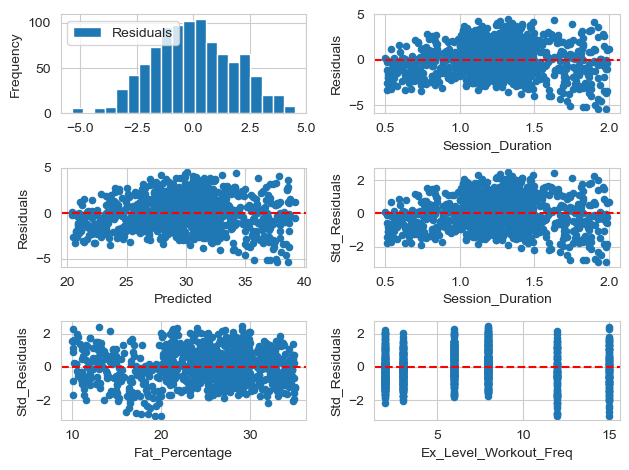

In [279]:
fig, ((g1, g2), (g3, g4), (g5, g6)) = plt.subplots(3,2)
data.plot(y = "Residuals", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Session_Duration", y = "Residuals", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Predicted", y = "Residuals", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Session_Duration", y = "Std_Residuals", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Fat_Percentage", y = "Std_Residuals", kind = "scatter", ax = g5)
g5.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Ex_Level_Workout_Freq", y = "Std_Residuals", kind = "scatter", ax = g6)
g6.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [280]:
formula = "Calories_Burned_SQRT ~ Session_Duration + Fat_Percentage + Ex_Level_Workout_Freq"
results = cross_validate_model_with_train_test(data, formula, "Calories_Burned_SQRT")

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 13113.2824, Std = 388.1576
Test_MSE: Mean = 13214.6342, Std = 1517.4086
Train_RMSE: Mean = 114.5005, Std = 1.7059
Test_RMSE: Mean = 114.7748, Std = 6.4319
Train_MAE: Mean = 90.0172, Std = 1.0209
Test_MAE: Mean = 90.3454, Std = 3.9863
Train_R2: Mean = 0.8234, Std = 0.0048
Test_R2: Mean = 0.8217, Std = 0.0172
Train_RSE: Mean = 114.7959, Std = 1.7102
Test_RSE: Mean = 115.9729, Std = 6.4977


In [281]:
model0 = smf.ols(formula="Calories_Burned_SQRT ~ Session_Duration + I(Session_Duration**2) + Fat_Percentage + Ex_Level_Workout_Freq", data=data).fit()
data["Predicted"] = model0.predict()
print(model0.summary())

                             OLS Regression Results                             
Dep. Variable:     Calories_Burned_SQRT   R-squared:                       0.856
Model:                              OLS   Adj. R-squared:                  0.855
Method:                   Least Squares   F-statistic:                     1434.
Date:                  Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                          19:20:20   Log-Likelihood:                -1925.8
No. Observations:                   973   AIC:                             3862.
Df Residuals:                       968   BIC:                             3886.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Inte

In [282]:
data["Residuals"] = data["Calories_Burned_SQRT"] - data["Predicted"]
std_residuals = data["Residuals"].std()
data["Std_Residuals"] = data["Residuals"] / std_residuals
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       1    88.3    1.71      180      157           60   
1     46       0    74.9    1.53      179      151           66   
2     32       0    68.1    1.66      167      122           54   
3     25       1    53.2    1.70      190      164           56   
4     38       1    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24       1    87.1    1.74      187      158           67   
969   25       1    66.6    1.61      184      166           56   
970   59       0    60.4    1.76      194      120           53   
971   32       1   126.4    1.83      198      146           62   
972   46       1    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned  Workout_Type  ...  Water_Intake  \
0                1.69           1313.0             3  ...           3.5   
1                1.30            883.0             1  ...           2.1   
2                1.11            677.0             0  ...           2.3   
3                0.59            532.0             2  ...           2.1   
4                0.64            556.0             2  ...           2.8   
..                ...              ...           ...  ...           ...   
968              1.57           1364.0             2  ...           3.5   
969              1.38           1260.0             2  ...           3.0   
970              1.72            929.0             0  ...           2.7   
971              1.10            883.0             1  ...           2.1   
972              0.75            542.0             2  ...           3.5   

     Workout_Frequency  Experience_Level    BMI  Ex_Level_Workout_Freq  \
0                    4                 3  30.20                     12   
1                    4                 2  32.00                      8   
2                    4                 2  24.71                      8   
3                    3                 1  18.41                      3   
4                    3                 1  14.39                      3   
..                 ...               ...    ...                    ...   
968                  4                 3  28.77                     12   
969                  2                 1  25.69                      2   
970                  5                 3  19.50                     15   
971                  3                 2  37.74                      6   
972                  2                 1  33.38                      2   

     Calories_Per_Hour  Predicted  Residuals  Std_Residuals  \
0           776.923077  35.561682   0.673660       0.384498   
1           679.230769  29.615346   0.099970       0.057059   
2           609.909910  27.344653  -1.325429      -0.756501   
3           901.694915  20.324045   2.741080       1.564498   
4           868.750000  21.138580   2.441072       1.393266   
..                 ...        ...        ...            ...   
968         868.789809  34.814681   2.117689       1.208692   
969         913.043478  31.965762   3.530716       2.015191   
970         540.116279  34.874167  -4.394665      -2.508298   
971         802.727273  27.954316   1.761000       1.005108   
972         722.666667  23.077160   0.203733       0.116283   

     Calories_Burned_SQRT  
0               36.235342  
1               29.715316  
2               26.019224  
3               23.065125  
4               23.579652  
..                    ...  
968             36.932371  
969             35.496479  
970             30.479501  
971             29.715316  
972             23.280893  

[973 rows x 21 columns]

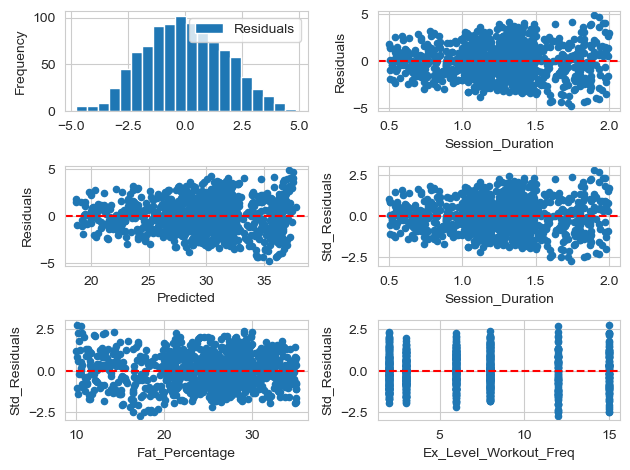

In [283]:
fig, ((g1, g2), (g3, g4), (g5, g6)) = plt.subplots(3,2)
data.plot(y = "Residuals", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Session_Duration", y = "Residuals", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Predicted", y = "Residuals", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Session_Duration", y = "Std_Residuals", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Fat_Percentage", y = "Std_Residuals", kind = "scatter", ax = g5)
g5.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Ex_Level_Workout_Freq", y = "Std_Residuals", kind = "scatter", ax = g6)
g6.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [284]:
formula = "Calories_Burned_SQRT ~ Session_Duration + I(Session_Duration**2) + Fat_Percentage + Ex_Level_Workout_Freq"
results = cross_validate_model_with_train_test(data, formula, "Calories_Burned_SQRT")

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 12059.6424, Std = 316.5428
Test_MSE: Mean = 12211.5831, Std = 1250.9631
Train_RMSE: Mean = 109.8068, Std = 1.4488
Test_RMSE: Mean = 110.3657, Std = 5.5677
Train_MAE: Mean = 86.9040, Std = 0.7707
Test_MAE: Mean = 87.4761, Std = 2.8323
Train_R2: Mean = 0.8376, Std = 0.0037
Test_R2: Mean = 0.8352, Std = 0.0141
Train_RSE: Mean = 110.1612, Std = 1.4534
Test_RSE: Mean = 111.8114, Std = 5.6389


In [285]:
model1 = smf.ols(formula="Calories_Burned ~ Session_Duration * Gender", data=data).fit()
data["Predicted"] = model1.predict()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1902.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:21:18   Log-Likelihood:                -5898.1
No. Observations:                 973   AIC:                         1.180e+04
Df Residuals:                     969   BIC:                         1.182e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [286]:
data["Residuals"] = data["Calories_Burned"] - data["Predicted"]
std_residuals = data["Residuals"].std()
data["Std_Residuals"] = data["Residuals"] / std_residuals
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       1    88.3    1.71      180      157           60   
1     46       0    74.9    1.53      179      151           66   
2     32       0    68.1    1.66      167      122           54   
3     25       1    53.2    1.70      190      164           56   
4     38       1    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24       1    87.1    1.74      187      158           67   
969   25       1    66.6    1.61      184      166           56   
970   59       0    60.4    1.76      194      120           53   
971   32       1   126.4    1.83      198      146           62   
972   46       1    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned  Workout_Type  ...  Water_Intake  \
0                1.69           1313.0             3  ...           3.5   
1                1.30            883.0             1  ...           2.1   
2                1.11            677.0             0  ...           2.3   
3                0.59            532.0             2  ...           2.1   
4                0.64            556.0             2  ...           2.8   
..                ...              ...           ...  ...           ...   
968              1.57           1364.0             2  ...           3.5   
969              1.38           1260.0             2  ...           3.0   
970              1.72            929.0             0  ...           2.7   
971              1.10            883.0             1  ...           2.1   
972              0.75            542.0             2  ...           3.5   

     Workout_Frequency  Experience_Level    BMI  Ex_Level_Workout_Freq  \
0                    4                 3  30.20                     12   
1                    4                 2  32.00                      8   
2                    4                 2  24.71                      8   
3                    3                 1  18.41                      3   
4                    3                 1  14.39                      3   
..                 ...               ...    ...                    ...   
968                  4                 3  28.77                     12   
969                  2                 1  25.69                      2   
970                  5                 3  19.50                     15   
971                  3                 2  37.74                      6   
972                  2                 1  33.38                      2   

     Calories_Per_Hour    Predicted   Residuals  Std_Residuals  \
0           776.923077  1281.555515   31.444485       0.302680   
1           679.230769   888.520202   -5.520202      -0.053137   
2           609.909910   761.111729  -84.111729      -0.809648   
3           901.694915   434.095185   97.904815       0.942418   
4           868.750000   472.616110   83.383890       0.802642   
..                 ...          ...         ...            ...   
968         868.789809  1189.105297  174.894703       1.683513   
969         913.043478  1042.725786  217.274214       2.091452   
970         540.116279  1170.159985 -241.159985      -2.321373   
971         802.727273   827.008611   55.991389       0.538965   
972         722.666667   557.362143  -15.362143      -0.147874   

     Calories_Burned_SQRT  
0               36.235342  
1               29.715316  
2               26.019224  
3               23.065125  
4               23.579652  
..                    ...  
968             36.932371  
969             35.496479  
970             30.479501  
971             29.715316  
972             23.280893  

[973 rows x 21 columns]

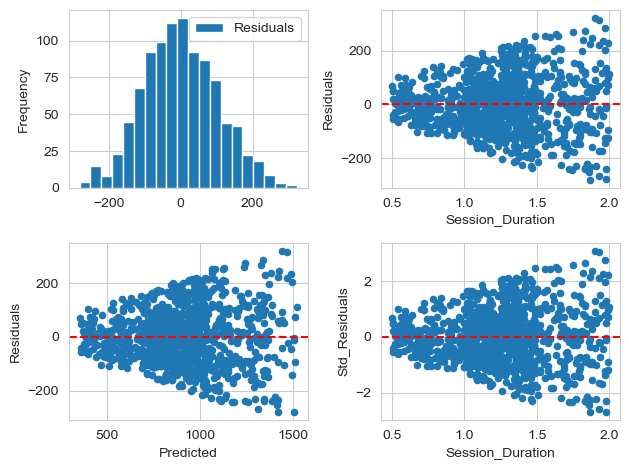

In [287]:
fig, ((g1, g2), (g3, g4)) = plt.subplots(2,2)
data.plot(y = "Residuals", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Session_Duration", y = "Residuals", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Predicted", y = "Residuals", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Session_Duration", y = "Std_Residuals", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [288]:
formula = "Calories_Burned ~ Session_Duration * Gender"
results = cross_validate_model_with_train_test(data, formula, "Calories_Burned")

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 10771.9532, Std = 250.5913
Test_MSE: Mean = 10865.1559, Std = 988.9522
Train_RMSE: Mean = 103.7809, Std = 1.2176
Test_RMSE: Mean = 104.1344, Std = 4.6023
Train_MAE: Mean = 82.9317, Std = 0.7506
Test_MAE: Mean = 83.2888, Std = 2.8169
Train_R2: Mean = 0.8549, Std = 0.0023
Test_R2: Mean = 0.8535, Std = 0.0087
Train_RSE: Mean = 104.0486, Std = 1.2207
Test_RSE: Mean = 105.2214, Std = 4.6493


In [289]:
model2 = smf.ols(formula="Calories_Burned_SQRT ~ Session_Duration * Gender", data=data).fit()
data["Predicted_SQRT"] = model2.predict()
print(model2.summary())

                             OLS Regression Results                             
Dep. Variable:     Calories_Burned_SQRT   R-squared:                       0.862
Model:                              OLS   Adj. R-squared:                  0.861
Method:                   Least Squares   F-statistic:                     2014.
Date:                  Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                          19:22:03   Log-Likelihood:                -1904.5
No. Observations:                   973   AIC:                             3817.
Df Residuals:                       969   BIC:                             3837.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Interc

In [290]:
data["Residuals_SQRT"] = data["Calories_Burned_SQRT"] - data["Predicted_SQRT"]
std_residuals = data["Residuals_SQRT"].std()
data["Std_Residuals_SQRT"] = data["Residuals_SQRT"] / std_residuals
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       1    88.3    1.71      180      157           60   
1     46       0    74.9    1.53      179      151           66   
2     32       0    68.1    1.66      167      122           54   
3     25       1    53.2    1.70      190      164           56   
4     38       1    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24       1    87.1    1.74      187      158           67   
969   25       1    66.6    1.61      184      166           56   
970   59       0    60.4    1.76      194      120           53   
971   32       1   126.4    1.83      198      146           62   
972   46       1    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned  Workout_Type  ...    BMI  \
0                1.69           1313.0             3  ...  30.20   
1                1.30            883.0             1  ...  32.00   
2                1.11            677.0             0  ...  24.71   
3                0.59            532.0             2  ...  18.41   
4                0.64            556.0             2  ...  14.39   
..                ...              ...           ...  ...    ...   
968              1.57           1364.0             2  ...  28.77   
969              1.38           1260.0             2  ...  25.69   
970              1.72            929.0             0  ...  19.50   
971              1.10            883.0             1  ...  37.74   
972              0.75            542.0             2  ...  33.38   

     Ex_Level_Workout_Freq  Calories_Per_Hour    Predicted   Residuals  \
0                       12         776.923077  1281.555515   31.444485   
1                        8         679.230769   888.520202   -5.520202   
2                        8         609.909910   761.111729  -84.111729   
3                        3         901.694915   434.095185   97.904815   
4                        3         868.750000   472.616110   83.383890   
..                     ...                ...          ...         ...   
968                     12         868.789809  1189.105297  174.894703   
969                      2         913.043478  1042.725786  217.274214   
970                     15         540.116279  1170.159985 -241.159985   
971                      6         802.727273   827.008611   55.991389   
972                      2         722.666667   557.362143  -15.362143   

     Std_Residuals  Calories_Burned_SQRT  Predicted_SQRT  Residuals_SQRT  \
0         0.302680             36.235342       35.980612        0.254729   
1        -0.053137             29.715316       29.499616        0.215700   
2        -0.809648             26.019224       27.269943       -1.250719   
3         0.942418             23.065125       21.860224        1.204902   
4         0.802642             23.579652       22.502059        1.077593   
..             ...                   ...             ...             ...   
968       1.683513             36.932371       34.440206        2.492164   
969       2.091452             35.496479       32.001230        3.495249   
970      -2.321373             30.479501       34.428367       -3.948865   
971       0.538965             29.715316       28.406949        1.308367   
972      -0.147874             23.280893       23.914098       -0.633205   

     Std_Residuals_SQRT  
0              0.148599  
1              0.125830  
2             -0.729618  
3              0.702890  
4              0.628623  
..                  ...  
968            1.453825  
969            2.038983  
970           -2.303604  
971            0.763247  
972           -0.369385  

[973 rows x 24 columns]

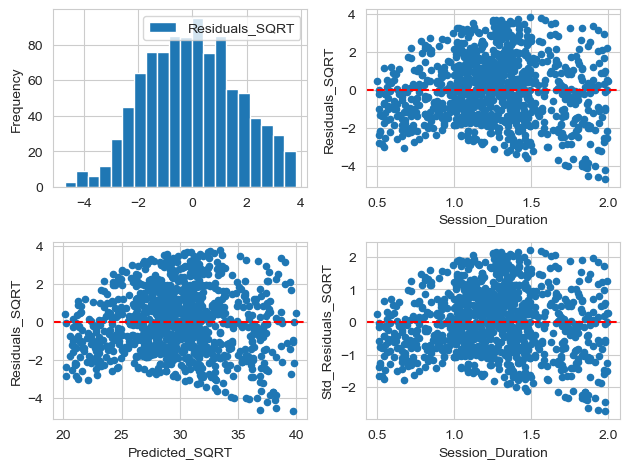

In [291]:
fig, ((g1, g2), (g3, g4)) = plt.subplots(2,2)
data.plot(y = "Residuals_SQRT", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Session_Duration", y = "Residuals_SQRT", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Predicted_SQRT", y = "Residuals_SQRT", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Session_Duration", y = "Std_Residuals_SQRT", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [292]:
formula = "Calories_Burned_SQRT ~ Session_Duration * Gender"
results = cross_validate_model_with_train_test(data, formula, "Calories_Burned_SQRT")

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 11369.2446, Std = 337.9144
Test_MSE: Mean = 11477.7637, Std = 1392.2348
Train_RMSE: Mean = 106.6147, Std = 1.5991
Test_RMSE: Mean = 106.9501, Std = 6.2800
Train_MAE: Mean = 84.7146, Std = 0.9314
Test_MAE: Mean = 85.0907, Std = 3.6070
Train_R2: Mean = 0.8469, Std = 0.0035
Test_R2: Mean = 0.8454, Std = 0.0130
Train_RSE: Mean = 106.8897, Std = 1.6031
Test_RSE: Mean = 108.0665, Std = 6.3440


In [293]:
columns_to_scale = ["Session_Duration", "Fat_Percentage", "Avg_BPM", "Water_Intake", "Age", "Max_BPM", "Resting_BPM", "Weight"
                    , "Height", "BMI", "Ex_Level_Workout_Freq", "Calories_Per_Hour"]
data.loc[:, columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
data_copy.loc[:, columns_to_scale] = scaler.fit_transform(data_copy[columns_to_scale])

C:\Users\Luka\AppData\Local\Temp\ipykernel_12648\404833490.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.92297044  0.50449409 -1.51814158  1.41119284  0.9927165   0.85322438
  1.75992313 -0.19296648 -1.16941129 -0.54169677  0.15576381  0.57424015
  1.4809389  -0.54169677  1.20195467 -0.89042706  1.62043102  1.4809389
  0.15576381  1.62043102 -1.16941129 -0.12322042  1.20195467  1.69017707
  0.29525592  1.75992313 -0.3324586  -0.61144283 -0.54169677 -0.61144283
 -0.40220465 -1.16941129  0.92297044  0.92297044  0.29525592  1.13220861
  0.78347832  0.08601775  0.43474804  1.34144678 -0.89042706 -0.54169677
 -0.68118889 -1.09966523  0.9927165   1.20195467  1.62043102 -0.89042706
  0.50449409  0.01627169  0.9927165  -0.47195071 -0.68118889  0.50449409
 -1.3089034   1.34144678  1.27170073  0.71373227  0.64398621  0.92297044
 -1.37864946 -0.47195071 -0.61144283 -1.16941129  0.01627169  0.50449409
  0.08601775 -0

In [294]:
dataX = data[["Session_Duration", "Fat_Percentage", "Ex_Level_Workout_Freq", "Calories_Per_Hour"]]
dataX

Session_Duration  Fat_Percentage  Ex_Level_Workout_Freq  \
0            1.264598       -1.978321               1.306226   
1            0.127098        1.426301               0.342832   
2           -0.427068        1.346380               0.342832   
3           -1.943735        0.611110              -0.861411   
4           -1.797902        0.675047              -0.861411   
..                ...             ...                    ...   
968          0.914598       -2.393908               1.306226   
969          0.360432        0.003713              -1.102259   
970          1.352098       -0.987304               2.028771   
971         -0.456235        0.515205              -0.138865   
972         -1.477068        0.611110              -1.102259   

     Calories_Per_Hour  
0             0.650257  
1            -0.474045  
2            -1.271831  
3             2.086205  
4             1.707056  
..                 ...  
968           1.707514  
969           2.216811  
970          -2.075057  
971           0.947227  
972           0.025841  

[973 rows x 4 columns]

In [295]:
dataY = data["Calories_Burned"]
dataY

0      1313.0
1       883.0
2       677.0
3       532.0
4       556.0
        ...  
968    1364.0
969    1260.0
970     929.0
971     883.0
972     542.0
Name: Calories_Burned, Length: 973, dtype: float64

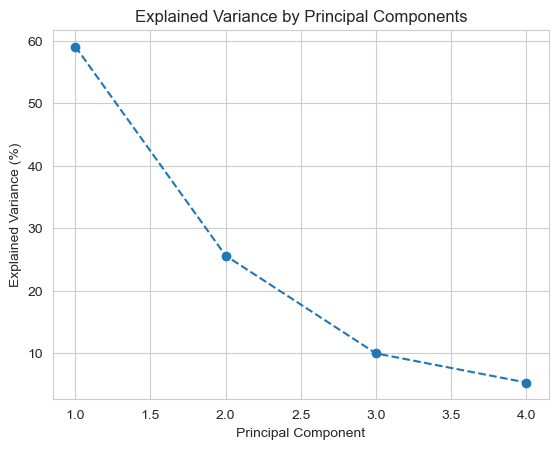

In [296]:
pca = PCA(n_components=4)
pca_4 = pca.fit_transform(dataX)

var = pca.explained_variance_ratio_

fig, ax = plt.subplots()
ax.plot(range(1, len(var) + 1), var * 100, marker='o', linestyle='--')
ax.set_title('Explained Variance by Principal Components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance (%)')
plt.show()


In [297]:
dataX = pd.DataFrame(data = pca_4 , columns = ["PC1", "PC2", "PC3", "PC4"])
new_data = pd.concat([dataX, dataY], axis = 1)
new_data

PC1       PC2       PC3       PC4  Calories_Burned
0    2.651615  0.587856 -0.473255 -0.203501           1313.0
1   -0.547469 -0.728841  1.099741  0.593616            883.0
2   -0.878512 -1.419737  0.537018  0.808944            677.0
3   -1.816408  2.305058 -0.359610  0.709854            532.0
4   -1.795957  1.907867 -0.302266  0.622432            556.0
..        ...       ...       ...       ...              ...
968  2.758665  1.722502 -0.779796 -0.061531           1364.0
969 -0.294893  2.246968  0.571459 -0.892615           1260.0
970  2.386661 -2.309347 -0.161786  0.411463            929.0
971 -0.561332  0.923741  0.301319  0.361836            883.0
972 -1.843439  0.270779 -0.534344  0.117121            542.0

[973 rows x 5 columns]

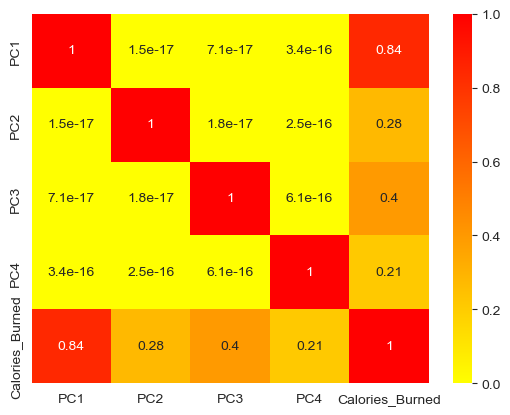

In [298]:
corr_matrix = new_data.corr()
sns.heatmap(abs(corr_matrix), annot=True, cmap=plt.cm.autumn_r)
plt.show()

In [299]:
data = pd.concat([data, dataX], axis = 1)
data

Age  Gender    Weight    Height   Max_BPM   Avg_BPM  Resting_BPM  \
0    1.422343       1  0.681493 -0.098545  0.010081  0.922970    -0.303555   
1    0.600965       0  0.049316 -1.508604 -0.076726  0.504494     0.515749   
2   -0.548964       0 -0.271491 -0.490228 -1.118414 -1.518142    -1.122858   
3   -1.123928       1 -0.974433 -0.176881  0.878155  1.411193    -0.849757   
4   -0.056137       1 -1.309393  0.528148  0.704540  0.992716     0.788850   
..        ...     ...       ...       ...       ...       ...          ...   
968 -1.206066       1  0.624880  0.136465  0.617733  0.992716     0.652299   
969 -1.123928       1 -0.342257 -0.881911  0.357311  1.550685    -0.849757   
970  1.668756       0 -0.634756  0.293138  1.225384 -1.657634    -1.259409   
971 -0.548964       1  2.478951  0.841495  1.572614  0.155764    -0.030454   
972  0.600965       1  0.700363 -0.725238 -1.205221  0.155764     0.515749   

     Session_Duration  Calories_Burned  Workout_Type  ...   Residuals  \
0            1.264598           1313.0             3  ...   31.444485   
1            0.127098            883.0             1  ...   -5.520202   
2           -0.427068            677.0             0  ...  -84.111729   
3           -1.943735            532.0             2  ...   97.904815   
4           -1.797902            556.0             2  ...   83.383890   
..                ...              ...           ...  ...         ...   
968          0.914598           1364.0             2  ...  174.894703   
969          0.360432           1260.0             2  ...  217.274214   
970          1.352098            929.0             0  ... -241.159985   
971         -0.456235            883.0             1  ...   55.991389   
972         -1.477068            542.0             2  ...  -15.362143   

     Std_Residuals  Calories_Burned_SQRT  Predicted_SQRT  Residuals_SQRT  \
0         0.302680             36.235342       35.980612        0.254729   
1        -0.053137             29.715316       29.499616        0.215700   
2        -0.809648             26.019224       27.269943       -1.250719   
3         0.942418             23.065125       21.860224        1.204902   
4         0.802642             23.579652       22.502059        1.077593   
..             ...                   ...             ...             ...   
968       1.683513             36.932371       34.440206        2.492164   
969       2.091452             35.496479       32.001230        3.495249   
970      -2.321373             30.479501       34.428367       -3.948865   
971       0.538965             29.715316       28.406949        1.308367   
972      -0.147874             23.280893       23.914098       -0.633205   

     Std_Residuals_SQRT       PC1       PC2       PC3       PC4  
0              0.148599  2.651615  0.587856 -0.473255 -0.203501  
1              0.125830 -0.547469 -0.728841  1.099741  0.593616  
2             -0.729618 -0.878512 -1.419737  0.537018  0.808944  
3              0.702890 -1.816408  2.305058 -0.359610  0.709854  
4              0.628623 -1.795957  1.907867 -0.302266  0.622432  
..                  ...       ...       ...       ...       ...  
968            1.453825  2.758665  1.722502 -0.779796 -0.061531  
969            2.038983 -0.294893  2.246968  0.571459 -0.892615  
970           -2.303604  2.386661 -2.309347 -0.161786  0.411463  
971            0.763247 -0.561332  0.923741  0.301319  0.361836  
972           -0.369385 -1.843439  0.270779 -0.534344  0.117121  

[973 rows x 28 columns]

In [300]:
model3 = smf.ols(formula="Calories_Burned ~ PC1 + PC2 + PC3", data=data).fit()
data["Predicted_PCA"] = model3.predict()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     5238.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:24:07   Log-Likelihood:                -5452.4
No. Observations:                 973   AIC:                         1.091e+04
Df Residuals:                     969   BIC:                         1.093e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    905.4224      2.110    429.149      0.0

In [301]:
data["Residuals_PCA"] = data["Calories_Burned"] - data["Predicted_PCA"]
std_residuals = data["Residuals_PCA"].std()
data["Std_Residuals_PCA"] = data["Residuals_PCA"] / std_residuals
data

Age  Gender    Weight    Height   Max_BPM   Avg_BPM  Resting_BPM  \
0    1.422343       1  0.681493 -0.098545  0.010081  0.922970    -0.303555   
1    0.600965       0  0.049316 -1.508604 -0.076726  0.504494     0.515749   
2   -0.548964       0 -0.271491 -0.490228 -1.118414 -1.518142    -1.122858   
3   -1.123928       1 -0.974433 -0.176881  0.878155  1.411193    -0.849757   
4   -0.056137       1 -1.309393  0.528148  0.704540  0.992716     0.788850   
..        ...     ...       ...       ...       ...       ...          ...   
968 -1.206066       1  0.624880  0.136465  0.617733  0.992716     0.652299   
969 -1.123928       1 -0.342257 -0.881911  0.357311  1.550685    -0.849757   
970  1.668756       0 -0.634756  0.293138  1.225384 -1.657634    -1.259409   
971 -0.548964       1  2.478951  0.841495  1.572614  0.155764    -0.030454   
972  0.600965       1  0.700363 -0.725238 -1.205221  0.155764     0.515749   

     Session_Duration  Calories_Burned  Workout_Type  ...  Predicted_SQRT  \
0            1.264598           1313.0             3  ...       35.980612   
1            0.127098            883.0             1  ...       29.499616   
2           -0.427068            677.0             0  ...       27.269943   
3           -1.943735            532.0             2  ...       21.860224   
4           -1.797902            556.0             2  ...       22.502059   
..                ...              ...           ...  ...             ...   
968          0.914598           1364.0             2  ...       34.440206   
969          0.360432           1260.0             2  ...       32.001230   
970          1.352098            929.0             0  ...       34.428367   
971         -0.456235            883.0             1  ...       28.406949   
972         -1.477068            542.0             2  ...       23.914098   

     Residuals_SQRT  Std_Residuals_SQRT       PC1       PC2       PC3  \
0          0.254729            0.148599  2.651615  0.587856 -0.473255   
1          0.215700            0.125830 -0.547469 -0.728841  1.099741   
2         -1.250719           -0.729618 -0.878512 -1.419737  0.537018   
3          1.204902            0.702890 -1.816408  2.305058 -0.359610   
4          1.077593            0.628623 -1.795957  1.907867 -0.302266   
..              ...                 ...       ...       ...       ...   
968        2.492164            1.453825  2.758665  1.722502 -0.779796   
969        3.495249            2.038983 -0.294893  2.246968  0.571459   
970       -3.948865           -2.303604  2.386661 -2.309347 -0.161786   
971        1.308367            0.763247 -0.561332  0.923741  0.301319   
972       -0.633205           -0.369385 -1.843439  0.270779 -0.534344   

          PC4  Predicted_PCA  Residuals_PCA  Std_Residuals_PCA  
0   -0.203501    1264.175596      48.824404           0.743034  
1    0.593616     957.168026     -74.168026          -1.128726  
2    0.808944     760.344039     -83.344039          -1.268372  
3    0.709854     744.360739    -212.360739          -3.231813  
4    0.622432     727.659176    -171.659176          -2.612396  
..        ...            ...            ...                ...  
968 -0.061531    1312.229287      51.770713           0.787873  
969 -0.892615    1126.034675     133.965325           2.038752  
970  0.411463    1062.308708    -133.308708          -2.028759  
971  0.361836     941.755059     -58.755059          -0.894164  
972  0.117121     559.214967     -17.214967          -0.261986  

[973 rows x 31 columns]

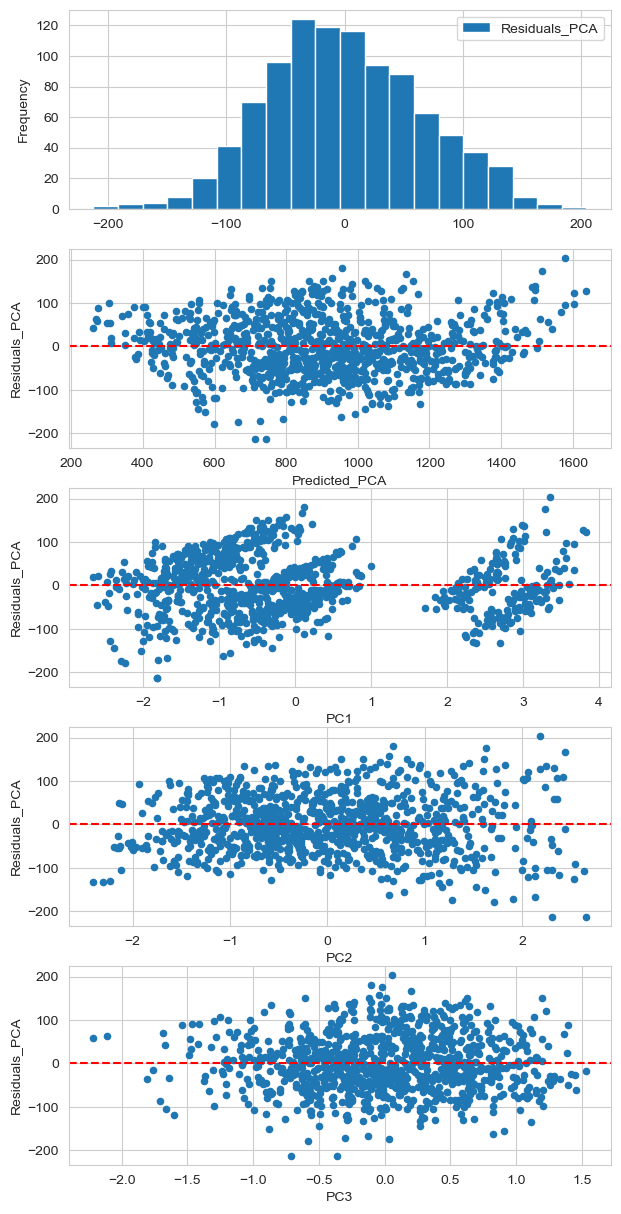

In [307]:
fig, ((g1), (g2), (g3), (g4), (g5)) = plt.subplots(5,1, figsize = (7, 15))
data.plot(y = "Residuals_PCA", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Predicted_PCA", y = "Residuals_PCA", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "PC1", y = "Residuals_PCA", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "PC2", y = "Residuals_PCA", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "PC3", y = "Residuals_PCA", kind = "scatter", ax = g5)
g5.axhline(y = 0, c = "red", linestyle = "dashed")
plt.show()

In [303]:
formula = "Calories_Burned ~ PC1 + PC2 + PC3"
results = cross_validate_model_with_train_test(data, formula, "Calories_Burned")

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 4306.4745, Std = 29.7510
Test_MSE: Mean = 4375.2354, Std = 106.0548
Train_RMSE: Mean = 65.6233, Std = 0.2268
Test_RMSE: Mean = 66.1407, Std = 0.8020
Train_MAE: Mean = 52.8422, Std = 0.4757
Test_MAE: Mean = 53.1792, Std = 1.8072
Train_R2: Mean = 0.9420, Std = 0.0009
Test_R2: Mean = 0.9408, Std = 0.0036
Train_RSE: Mean = 65.7926, Std = 0.2273
Test_RSE: Mean = 66.8311, Std = 0.8104


In [313]:
#WE HAVE 4 GOOD PREDICTORS TO USE FOR OUR TARGET WITH CORRELATION GREATER THAN 0.5
#WE HAVE ONE PREDICTOR WITH VIF GREATER THAN 5, SO WE NEEDED TO TRANSFORM IT AND USE IT IN MODEL WITH OTHER PREDICTORS
#WE DID PCA, TO REDUCE DIMENSIONALITY AND TO REDUCE MULTYCOLINEARITY
#NOW LET'S TRY WITH SOME MORE FLEXIBLE MODEL
#XGBOOST

In [314]:
data_copy = pd.concat([data_copy, dataX], axis = 1)
data_copy

Age  Gender    Weight    Height   Max_BPM   Avg_BPM  Resting_BPM  \
0    1.422343       1  0.681493 -0.098545  0.010081  0.922970    -0.303555   
1    0.600965       0  0.049316 -1.508604 -0.076726  0.504494     0.515749   
2   -0.548964       0 -0.271491 -0.490228 -1.118414 -1.518142    -1.122858   
3   -1.123928       1 -0.974433 -0.176881  0.878155  1.411193    -0.849757   
4   -0.056137       1 -1.309393  0.528148  0.704540  0.992716     0.788850   
..        ...     ...       ...       ...       ...       ...          ...   
968 -1.206066       1  0.624880  0.136465  0.617733  0.992716     0.652299   
969 -1.123928       1 -0.342257 -0.881911  0.357311  1.550685    -0.849757   
970  1.668756       0 -0.634756  0.293138  1.225384 -1.657634    -1.259409   
971 -0.548964       1  2.478951  0.841495  1.572614  0.155764    -0.030454   
972  0.600965       1  0.700363 -0.725238 -1.205221  0.155764     0.515749   

     Session_Duration  Calories_Burned  Workout_Type  ...  Water_Intake  \
0            1.264598           1313.0             3  ...      1.455967   
1            0.127098            883.0             1  ...     -0.877898   
2           -0.427068            677.0             0  ...     -0.544488   
3           -1.943735            532.0             2  ...     -0.877898   
4           -1.797902            556.0             2  ...      0.289035   
..                ...              ...           ...  ...           ...   
968          0.914598           1364.0             2  ...      1.455967   
969          0.360432           1260.0             2  ...      0.622444   
970          1.352098            929.0             0  ...      0.122330   
971         -0.456235            883.0             1  ...     -0.877898   
972         -1.477068            542.0             2  ...      1.455967   

     Workout_Frequency  Experience_Level       BMI  Ex_Level_Workout_Freq  \
0                    4                 3  0.794278               1.306226   
1                    4                 2  1.064652               0.342832   
2                    4                 2 -0.030361               0.342832   
3                    3                 1 -0.976669              -0.861411   
4                    3                 1 -1.580503              -0.861411   
..                 ...               ...       ...                    ...   
968                  4                 3  0.579482               1.306226   
969                  2                 1  0.116842              -1.102259   
970                  5                 3 -0.812942               2.028771   
971                  3                 2  1.926843              -0.138865   
972                  2                 1  1.271938              -1.102259   

     Calories_Per_Hour       PC1       PC2       PC3       PC4  
0             0.650257  2.651615  0.587856 -0.473255 -0.203501  
1            -0.474045 -0.547469 -0.728841  1.099741  0.593616  
2            -1.271831 -0.878512 -1.419737  0.537018  0.808944  
3             2.086205 -1.816408  2.305058 -0.359610  0.709854  
4             1.707056 -1.795957  1.907867 -0.302266  0.622432  
..                 ...       ...       ...       ...       ...  
968           1.707514  2.758665  1.722502 -0.779796 -0.061531  
969           2.216811 -0.294893  2.246968  0.571459 -0.892615  
970          -2.075057  2.386661 -2.309347 -0.161786  0.411463  
971           0.947227 -0.561332  0.923741  0.301319  0.361836  
972           0.025841 -1.843439  0.270779 -0.534344  0.117121  

[973 rows x 21 columns]

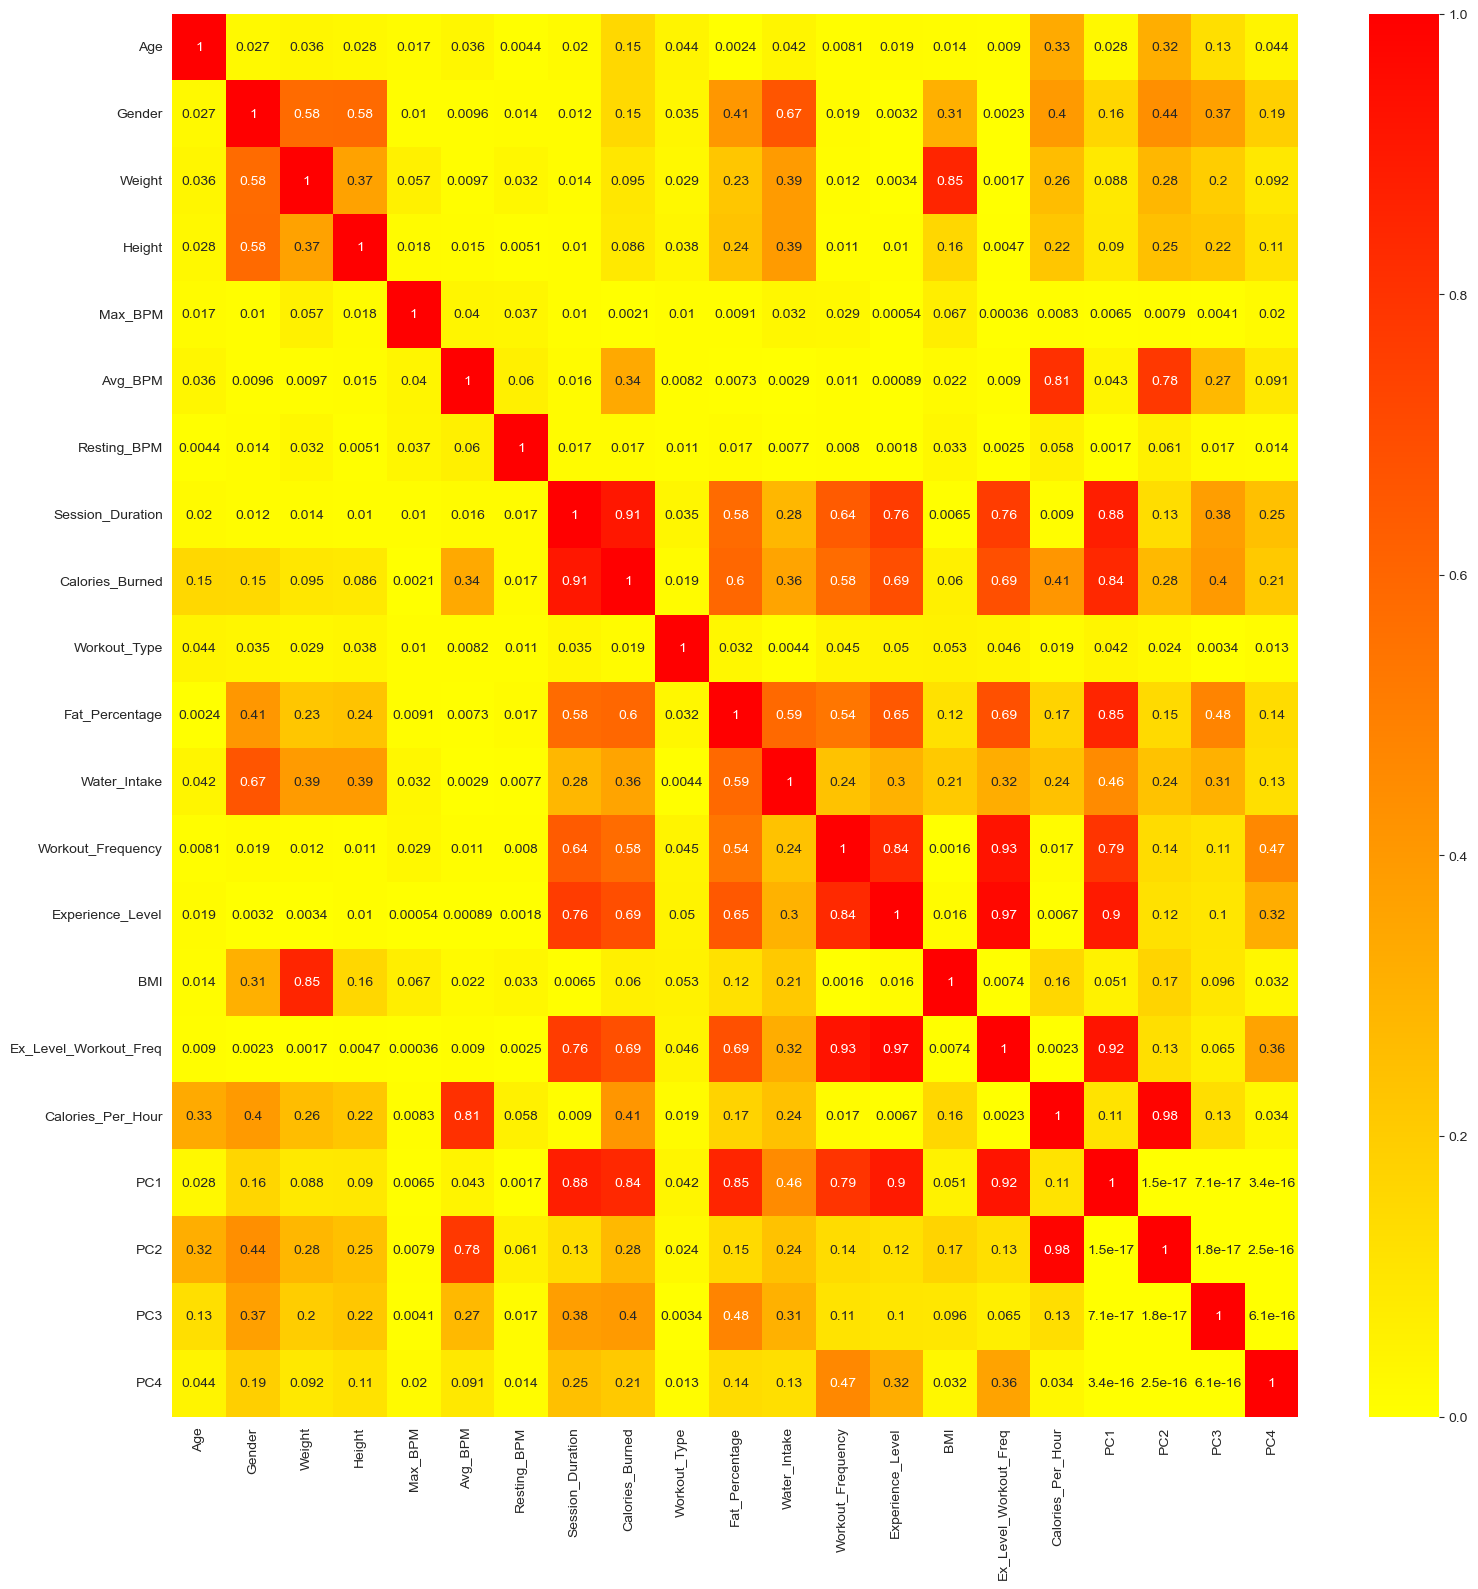

In [315]:
corr_matrix = data_copy.corr()
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(abs(corr_matrix), annot=True, cmap=plt.cm.autumn_r)
fig.tight_layout()
plt.show()

In [316]:
def calculate_rse(y_true, y_pred):
    rss = np.sum((y_true - y_pred) ** 2)
    rse = np.sqrt(rss / (len(y_true) - 1))
    return rse

In [339]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
    'max_depth': [2, 3, 4, 5,6,7,None],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [2,4,6,8,10, 12, 14, 16],
    'lambda': [5.0, 6.0, 7.0, 8.0, 9.0, 10.0], 
    'alpha': [5.0, 6.0, 7.0, 8.0, 9.0, 10.0]   
}

X = data_copy.drop(columns=["Calories_Burned", "PC1", "PC2", "PC3", "PC4", "Calories_Per_Hour"])
y = data_copy['Calories_Burned']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  
    scoring='neg_mean_squared_error',
    cv=kf,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X, y)

best_xgb_model = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

train_mse_scores, test_mse_scores = [], []
train_rse_scores, test_rse_scores = [], []
train_mae_scores, test_mae_scores = [], []
train_rmse_scores, test_rmse_scores = [], []
train_r2_scores, test_r2_scores = [], []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    best_xgb_model.fit(X_train, y_train)
    train_predictions = best_xgb_model.predict(X_train)
    test_predictions = best_xgb_model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)

    train_rse = calculate_rse(y_train, train_predictions)
    test_rse = calculate_rse(y_test, test_predictions)
    train_rse_scores.append(train_rse)
    test_rse_scores.append(test_rse)

    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_mae_scores.append(train_mae)
    test_mae_scores.append(test_mae)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_rmse_scores.append(train_rmse)
    test_rmse_scores.append(test_rmse)

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

results_df = pd.DataFrame({
    "Metric": ["Train_MSE", "Test_MSE", "Train_RSE", "Test_RSE", "Train_MAE", "Test_MAE", "Train_RMSE", "Test_RMSE", "Train_R2", "Test_R2"],
    "Mean": [
        np.mean(train_mse_scores),
        np.mean(test_mse_scores),
        np.mean(train_rse_scores),
        np.mean(test_rse_scores),
        np.mean(train_mae_scores),
        np.mean(test_mae_scores),
        np.mean(train_rmse_scores),
        np.mean(test_rmse_scores),
        np.mean(train_r2_scores),
        np.mean(test_r2_scores)
    ],
    "Std": [
        np.std(train_mse_scores),
        np.std(test_mse_scores),
        np.std(train_rse_scores),
        np.std(test_rse_scores),
        np.std(train_mae_scores),
        np.std(test_mae_scores),
        np.std(train_rmse_scores),
        np.std(test_rmse_scores),
        np.std(train_r2_scores),
        np.std(test_r2_scores)
    ]
})

print(results_df)


Best parameters: {'subsample': 0.6, 'n_estimators': 700, 'min_child_weight': 12, 'max_depth': 2, 'learning_rate': 0.05, 'lambda': 9.0, 'colsample_bytree': 1.0, 'alpha': 5.0}
       Metric        Mean        Std
0   Train_MSE  103.864562   5.736407
1    Test_MSE  238.676487  56.291026
2   Train_RSE   10.194103   0.280053
3    Test_RSE   15.382085   1.816685
4   Train_MAE    7.828706   0.232481
5    Test_MAE   11.373556   0.987511
6  Train_RMSE   10.187553   0.279874
7   Test_RMSE   15.342519   1.812073
8    Train_R2    0.998602   0.000054
9     Test_R2    0.996790   0.000680


In [340]:
best_xgb_model.fit(X, y)
data["Predicted_XGB"] = best_xgb_model.predict(X)
data["Residuals_XGB"] = data["Calories_Burned"] - data["Predicted_XGB"]
std_residuals = data["Residuals_XGB"].std()
data["Std_Residuals_XGB"] = data["Residuals_XGB"] / std_residuals
data

Age  Gender    Weight    Height   Max_BPM   Avg_BPM  Resting_BPM  \
0    1.422343       1  0.681493 -0.098545  0.010081  0.922970    -0.303555   
1    0.600965       0  0.049316 -1.508604 -0.076726  0.504494     0.515749   
2   -0.548964       0 -0.271491 -0.490228 -1.118414 -1.518142    -1.122858   
3   -1.123928       1 -0.974433 -0.176881  0.878155  1.411193    -0.849757   
4   -0.056137       1 -1.309393  0.528148  0.704540  0.992716     0.788850   
..        ...     ...       ...       ...       ...       ...          ...   
968 -1.206066       1  0.624880  0.136465  0.617733  0.992716     0.652299   
969 -1.123928       1 -0.342257 -0.881911  0.357311  1.550685    -0.849757   
970  1.668756       0 -0.634756  0.293138  1.225384 -1.657634    -1.259409   
971 -0.548964       1  2.478951  0.841495  1.572614  0.155764    -0.030454   
972  0.600965       1  0.700363 -0.725238 -1.205221  0.155764     0.515749   

     Session_Duration  Calories_Burned  Workout_Type  ...       PC1       PC2  \
0            1.264598           1313.0             3  ...  2.651615  0.587856   
1            0.127098            883.0             1  ... -0.547469 -0.728841   
2           -0.427068            677.0             0  ... -0.878512 -1.419737   
3           -1.943735            532.0             2  ... -1.816408  2.305058   
4           -1.797902            556.0             2  ... -1.795957  1.907867   
..                ...              ...           ...  ...       ...       ...   
968          0.914598           1364.0             2  ...  2.758665  1.722502   
969          0.360432           1260.0             2  ... -0.294893  2.246968   
970          1.352098            929.0             0  ...  2.386661 -2.309347   
971         -0.456235            883.0             1  ... -0.561332  0.923741   
972         -1.477068            542.0             2  ... -1.843439  0.270779   

          PC3       PC4  Predicted_PCA  Residuals_PCA  Std_Residuals_PCA  \
0   -0.473255 -0.203501    1264.175596      48.824404           0.743034   
1    1.099741  0.593616     957.168026     -74.168026          -1.128726   
2    0.537018  0.808944     760.344039     -83.344039          -1.268372   
3   -0.359610  0.709854     744.360739    -212.360739          -3.231813   
4   -0.302266  0.622432     727.659176    -171.659176          -2.612396   
..        ...       ...            ...            ...                ...   
968 -0.779796 -0.061531    1312.229287      51.770713           0.787873   
969  0.571459 -0.892615    1126.034675     133.965325           2.038752   
970 -0.161786  0.411463    1062.308708    -133.308708          -2.028759   
971  0.301319  0.361836     941.755059     -58.755059          -0.894164   
972 -0.534344  0.117121     559.214967     -17.214967          -0.261986   

     Predicted_XGB  Residuals_XGB  Std_Residuals_XGB  
0      1309.399902       3.600098           0.372009  
1       887.944153      -4.944153          -0.510895  
2       676.126404       0.873596           0.090271  
3       529.947449       2.052551           0.212097  
4       576.176636     -20.176636          -2.084915  
..             ...            ...                ...  
968    1378.170044     -14.170044          -1.464235  
969    1245.841431      14.158569           1.463049  
970     927.682922       1.317078           0.136098  
971     878.188721       4.811279           0.497165  
972     530.635986      11.364014           1.174279  

[973 rows x 34 columns]

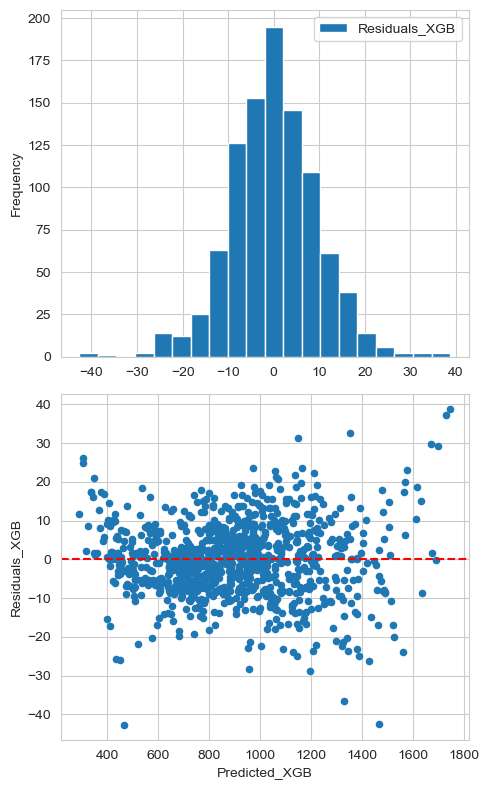

In [341]:
fig, ((g1), (g2)) = plt.subplots(2, 1, figsize = (5,8))
data.plot(y = "Residuals_XGB", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Predicted_XGB", y = "Residuals_XGB", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

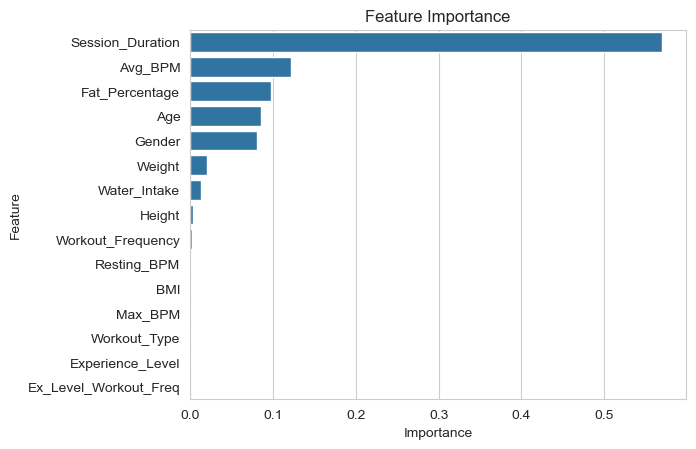

In [342]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title("Feature Importance")
plt.show()

In [347]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
    'max_depth': [2, 3, 4, 5,6,7,None],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [2,4,6,8,10, 12, 14, 16],
    'lambda': [1, 2, 3, 4, 5.0, 6.0, 7.0], 
    'alpha': [1, 2, 3, 4, 5.0, 6.0, 7.0]   
}

X = data_copy[["Session_Duration", "Avg_BPM", "Fat_Percentage", "Age", "Gender"]]
y = data_copy['Calories_Burned']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  
    scoring='neg_mean_squared_error',
    cv=kf,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X, y)

best_xgb_model = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

train_mse_scores, test_mse_scores = [], []
train_rse_scores, test_rse_scores = [], []
train_mae_scores, test_mae_scores = [], []
train_rmse_scores, test_rmse_scores = [], []
train_r2_scores, test_r2_scores = [], []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    best_xgb_model.fit(X_train, y_train)
    train_predictions = best_xgb_model.predict(X_train)
    test_predictions = best_xgb_model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)

    train_rse = calculate_rse(y_train, train_predictions)
    test_rse = calculate_rse(y_test, test_predictions)
    train_rse_scores.append(train_rse)
    test_rse_scores.append(test_rse)

    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_mae_scores.append(train_mae)
    test_mae_scores.append(test_mae)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_rmse_scores.append(train_rmse)
    test_rmse_scores.append(test_rmse)

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

results_df = pd.DataFrame({
    "Metric": ["Train_MSE", "Test_MSE", "Train_RSE", "Test_RSE", "Train_MAE", "Test_MAE", "Train_RMSE", "Test_RMSE", "Train_R2", "Test_R2"],
    "Mean": [
        np.mean(train_mse_scores),
        np.mean(test_mse_scores),
        np.mean(train_rse_scores),
        np.mean(test_rse_scores),
        np.mean(train_mae_scores),
        np.mean(test_mae_scores),
        np.mean(train_rmse_scores),
        np.mean(test_rmse_scores),
        np.mean(train_r2_scores),
        np.mean(test_r2_scores)
    ],
    "Std": [
        np.std(train_mse_scores),
        np.std(test_mse_scores),
        np.std(train_rse_scores),
        np.std(test_rse_scores),
        np.std(train_mae_scores),
        np.std(test_mae_scores),
        np.std(train_rmse_scores),
        np.std(test_rmse_scores),
        np.std(train_r2_scores),
        np.std(test_r2_scores)
    ]
})

print(results_df)


Best parameters: {'subsample': 0.6, 'n_estimators': 700, 'min_child_weight': 12, 'max_depth': 2, 'learning_rate': 0.05, 'lambda': 3, 'colsample_bytree': 1.0, 'alpha': 1}
       Metric        Mean        Std
0   Train_MSE   80.551898   5.152042
1    Test_MSE  172.583813  37.670043
2   Train_RSE    8.976354   0.283860
3    Test_RSE   13.093167   1.429692
4   Train_MAE    6.897858   0.196585
5    Test_MAE    9.759360   0.842762
6  Train_RMSE    8.970587   0.283680
7   Test_RMSE   13.059486   1.426056
8    Train_R2    0.998915   0.000075
9     Test_R2    0.997685   0.000442


In [348]:
best_xgb_model.fit(X, y)
data["Predicted_XGB"] = best_xgb_model.predict(X)
data["Residuals_XGB"] = data["Calories_Burned"] - data["Predicted_XGB"]
std_residuals = data["Residuals_XGB"].std()
data["Std_Residuals_XGB"] = data["Residuals_XGB"] / std_residuals
data

Age  Gender    Weight    Height   Max_BPM   Avg_BPM  Resting_BPM  \
0    1.422343       1  0.681493 -0.098545  0.010081  0.922970    -0.303555   
1    0.600965       0  0.049316 -1.508604 -0.076726  0.504494     0.515749   
2   -0.548964       0 -0.271491 -0.490228 -1.118414 -1.518142    -1.122858   
3   -1.123928       1 -0.974433 -0.176881  0.878155  1.411193    -0.849757   
4   -0.056137       1 -1.309393  0.528148  0.704540  0.992716     0.788850   
..        ...     ...       ...       ...       ...       ...          ...   
968 -1.206066       1  0.624880  0.136465  0.617733  0.992716     0.652299   
969 -1.123928       1 -0.342257 -0.881911  0.357311  1.550685    -0.849757   
970  1.668756       0 -0.634756  0.293138  1.225384 -1.657634    -1.259409   
971 -0.548964       1  2.478951  0.841495  1.572614  0.155764    -0.030454   
972  0.600965       1  0.700363 -0.725238 -1.205221  0.155764     0.515749   

     Session_Duration  Calories_Burned  Workout_Type  ...       PC1       PC2  \
0            1.264598           1313.0             3  ...  2.651615  0.587856   
1            0.127098            883.0             1  ... -0.547469 -0.728841   
2           -0.427068            677.0             0  ... -0.878512 -1.419737   
3           -1.943735            532.0             2  ... -1.816408  2.305058   
4           -1.797902            556.0             2  ... -1.795957  1.907867   
..                ...              ...           ...  ...       ...       ...   
968          0.914598           1364.0             2  ...  2.758665  1.722502   
969          0.360432           1260.0             2  ... -0.294893  2.246968   
970          1.352098            929.0             0  ...  2.386661 -2.309347   
971         -0.456235            883.0             1  ... -0.561332  0.923741   
972         -1.477068            542.0             2  ... -1.843439  0.270779   

          PC3       PC4  Predicted_PCA  Residuals_PCA  Std_Residuals_PCA  \
0   -0.473255 -0.203501    1264.175596      48.824404           0.743034   
1    1.099741  0.593616     957.168026     -74.168026          -1.128726   
2    0.537018  0.808944     760.344039     -83.344039          -1.268372   
3   -0.359610  0.709854     744.360739    -212.360739          -3.231813   
4   -0.302266  0.622432     727.659176    -171.659176          -2.612396   
..        ...       ...            ...            ...                ...   
968 -0.779796 -0.061531    1312.229287      51.770713           0.787873   
969  0.571459 -0.892615    1126.034675     133.965325           2.038752   
970 -0.161786  0.411463    1062.308708    -133.308708          -2.028759   
971  0.301319  0.361836     941.755059     -58.755059          -0.894164   
972 -0.534344  0.117121     559.214967     -17.214967          -0.261986   

     Predicted_XGB  Residuals_XGB  Std_Residuals_XGB  
0      1307.122192       5.877808           0.662834  
1       886.513672      -3.513672          -0.396233  
2       674.947144       2.052856           0.231498  
3       530.094910       1.905090           0.214835  
4       577.935425     -21.935425          -2.473633  
..             ...            ...                ...  
968    1379.737427     -15.737427          -1.774692  
969    1253.248291       6.751709           0.761383  
970     920.983337       8.016663           0.904030  
971     878.596985       4.403015           0.496523  
972     531.873169      10.126831           1.141991  

[973 rows x 34 columns]

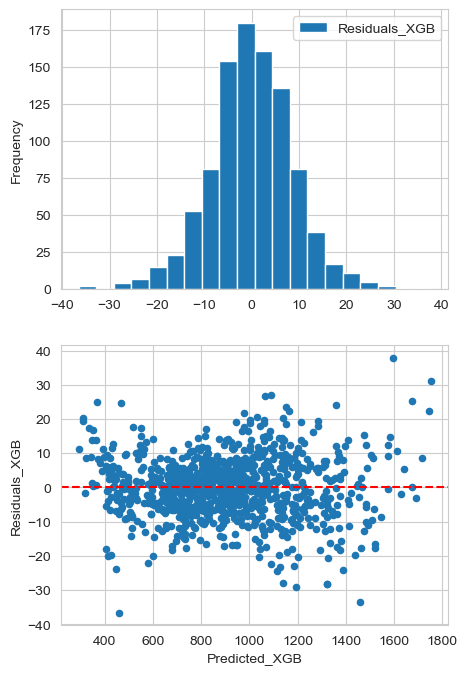

In [349]:
fig, ((g1), (g2)) = plt.subplots(2,1, figsize = (5,8))
data.plot(y = "Residuals_XGB", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Predicted_XGB", y = "Residuals_XGB", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
plt.show()


In [350]:
numeric_features = ['Session_Duration', 'Avg_BPM', 'Fat_Percentage', "Age"]
categorical_features = ["Gender"]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

final_xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('xgboost', random_search.best_estimator_)  
])

X = raw_data[["Session_Duration", "Avg_BPM", "Fat_Percentage", "Age", "Gender"]]
y = raw_data['Calories_Burned']

final_xgb_model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Session_Duration',
                                                   'Avg_BPM', 'Fat_Percentage',
                                                   'Age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender'])])),
                ('xgboost',
                 XGBRegressor(alpha=1, base_score=None, booster=None,
                              callbacks=None, colsample_bylevel=None,
                              colsample_bynode=None, colsample_bytree=1.0,
                              device=None, early_stopping_...
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, lambda=3,
                              learning_rate=0.05, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=2, max_leaves=None,
                              min_child_weight=12, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=700, n_jobs=None, ...))])

In [351]:
with open('model.pkl', 'wb') as f:
    pickle.dump(final_xgb_model, f)
print("Model saved")

Model saved


In [352]:
data_pred = {
    "Session_Duration": [1.69],
    "Avg_BPM": [157],
    "Fat_Percentage": [12.6],
    "Age": [56],
    "Gender": ["Male"]
}

df = pd.DataFrame(data_pred)
df

Session_Duration  Avg_BPM  Fat_Percentage  Age Gender
0              1.69      157            12.6   56   Male

In [353]:
prediction = final_xgb_model.predict(df)
prediction

array([1307.1222], dtype=float32)